In [101]:
!pip install xgboost

In [1]:
!pip install seaborn

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

from collections import Counter

import warnings
warnings.filterwarnings("ignore") #Ignore certain system-wide alerts

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

### Data

In [2]:
data = pd.read_csv("telecom_customer_churn.csv")

churn_data=data.copy()
churn_data.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  change_rev  drop_vce_Mean  \
0          0.0          0.0        0.0     -157.25    -18.9975       0.666667   
1          9.1          0.0        0.0      532.25     50.9875       8.333333   
2          0.0          0.0        0.0       -4.25      0.0000       0.333333   
3          0.0          0.0        0.0       -1.50      0.0000       0.000000   
4          0.0          0.0        0.0       38.50      0.0000       9.666667   

   drop_dat_Mean  blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  \
0            0.0       0.666667            0.0       6.333333            0.0   
1            0.0       1.000000            0.0      61.333333            0.0   
2            0.0       0.000000            0.0       2.666667            0.0   
3            0.0       0.000000            0.0       0.000000            0.0   
4            0.0       0.666667            0.0      77.000000            0.0   

   plcd_vce_Mean  plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  \
0      52.333333            0.0      42.333333            0.0      45.000000   
1     263.333333            0.0      69.000000            0.0     193.333333   
2       9.000000            0.0       0.333333            0.0       6.000000   
3       3.666667            0.0       1.333333            0.0       3.666667   
4     222.333333            0.0      94.666667            0.0     137.000000   

   comp_dat_Mean  custcare_Mean  ccrndmou_Mean  cc_mou_Mean  inonemin_Mean  \
0            0.0       0.000000       0.000000     0.000000      18.000000   
1            0.0       1.666667       6.333333     5.463333      53.000000   
2            0.0       0.000000       0.000000     0.000000       0.333333   
3            0.0       0.000000       0.000000     0.000000       1.333333   
4            0.0       8.666667      15.000000    11.076667      66.000000   

   threeway_Mean  mou_cvce_Mean  mou_cdat_Mean  mou_rvce_Mean  \
0       0.000000      90.643333            0.0      97.176667   
1       0.333333     189.396667            0.0      55.280000   
2       0.000000       5.426667            0.0       0.000000   
3       0.000000       8.410000            0.0       0.413333   
4       0.000000     285.233333            0.0     106.330000   

   owylis_vce_Mean  mouowylisv_Mean  iwylis_vce_Mean  mouiwylisv_Mean  \
0         0.000000         0.000000         0.000000         0.000000   
1        46.333333        24.216667         6.333333         3.696667   
2         0.000000         0.000000         0.000000         0.000000   
3         0.333333         0.256667         0.000000         0.000000   
4        14.666667        10.816667         0.666667         0.366667   

   peak_vce_Mean  peak_dat_Mean  mou_peav_Mean  mou_pead_Mean  opk_vce_Mean  \
0      58.000000            0.0     132.600000            0.0     24.000000   
1      83.666667            0.0      75.333333            0.0    157.000000   
2       5.000000            0.0       5.193333            0.0      1.000000   
3       1.333333            0.0       3.380000            0.0      3.666667   
4      97.333333            0.0     173.476667            0.0     90.333333   

   opk_dat_Mean  mou_opkv_Mean  mou_opkd_Mean  drop_blk_Mean  attempt_Mean  \
0           0.0      55.220000            0.0       1.333333     52.333333   
1           0.0     169.343333            0.0       9.333333    263.333333   
2           0.0       0.233333            0.0       0.333333      9.000000   
3           0.0       5.45000

## 1. Exploratory Data Analysis

In [3]:

churn_data.describe(include=['O'])

new_cell crclscod asl_flag prizm_social_one                area  \
count    100000   100000   100000            92612               99960   
unique        3       54        2                5                  19   
top           U       AA        N                S  NEW YORK CITY AREA   
freq      66914    36509    86064            32097               11098   

       dualband refurb_new hnd_webcap ownrent dwlltype marital infobase  \
count     99999      99999      89811   66294    68091   98268    77921   
unique        4          2          3       2        2       5        2   
top           Y          N       WCMB       O        S       U        M   
freq      72265      85593      75733   64284    48759   37333    77697   

       HHstatin dwllsize ethnic kid0_2 kid3_5 kid6_10 kid11_15 kid16_17  \
count     62077    61692  98268  98268  98268   98268    98268    98268   
unique        6       15     17      2      2       2        2        2   
top           C        A      N      U      U       U        U        U   
freq      39124    47205  33389  94256  93572   90195    89454    88304   

       creditcd  
count     98268  
unique        2  
top           Y  
freq      67234

In [4]:
churn_data.describe()

rev_Mean      mou_Mean   totmrc_Mean       da_Mean   ovrmou_Mean  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99643.000000   
mean      58.719985    513.559937     46.179136      0.888828     41.072247   
std       46.291677    525.168140     23.623489      2.177619     97.296150   
min       -6.167500      0.000000    -26.915000      0.000000      0.000000   
25%       33.260000    150.750000     30.000000      0.000000      0.000000   
50%       48.195000    355.500000     44.990000      0.247500      2.750000   
75%       70.750000    703.000000     59.990000      0.990000     42.000000   
max     3843.262500  12206.750000    409.990000    159.390000   4320.750000   

        ovrrev_Mean   vceovr_Mean   datovr_Mean     roam_Mean    change_mou  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99109.000000   
mean      13.559560     13.295062      0.261318      1.286405    -13.933818   
std       30.500885     30.056089      3.126531     14.711374    276.087509   
min        0.000000      0.000000      0.000000      0.000000  -3875.000000   
25%        0.000000      0.000000      0.000000      0.000000    -87.000000   
50%        1.000000      0.682500      0.000000      0.000000     -6.250000   
75%       14.437500     14.025000      0.000000      0.235000     63.000000   
max     1102.400000    896.087500    423.540000   3685.200000  31219.250000   

         change_rev  drop_vce_Mean  drop_dat_Mean  blck_vce_Mean  \
count  99109.000000  100000.000000  100000.000000  100000.000000   
mean      -1.021067       5.955085       0.040520       4.022917   
std       50.363209       8.954715       0.877136      10.672202   
min    -1107.740000       0.000000       0.000000       0.000000   
25%       -7.365000       0.666667       0.000000       0.000000   
50%       -0.315000       3.000000       0.000000       1.000000   
75%        1.642500       7.666667       0.000000       3.666667   
max     9963.657500     232.666667     207.333333     385.333333   

       blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  plcd_vce_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.025777      27.784905       0.029810     144.881677   
std         1.490255      38.358734       0.496970     158.267711   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.000000       0.000000      38.333333   
50%         0.000000      16.000000       0.000000     100.333333   
75%         0.000000      36.000000       0.000000     198.666667   
max       413.333333     848.666667      81.666667    2289.000000   

       plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.870548      55.085152       0.047590     108.892535   
std         9.053901      86.841198       2.127422     118.580079   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.333333       0.000000      28.666667   
50%         0.000000      26.666667       0.000000      75.666667   
75%         0.000000      71.333333       0.000000     149.666667   
max       733.666667    3369.333333     517.333333    1894.333333   

       comp_dat_Mean  custcare_Mean  ccrndmou_Mean    cc_mou_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.774442       1.790838       4.666880       3.683328   
std         8.129844       5.315570      12.761953      10.539981   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.666667       4.000000       2.873333   
max       559.333333     675.333333     861.333333     602.950000   

       inonemin_Mean  threeway_Mean  mou_cvce_Mean  mou_cdat_Mean  \
count  100000.000000  100000.000000  10

In [5]:
print('Unique data types are:', list(churn_data.dtypes.unique()), '\n')

print('Attributes with Object dtype: ', churn_data.select_dtypes(include=['object']).shape[1], '\n')
print('Attributes with Object dtype: ', churn_data.select_dtypes(include=['object']).columns, '\n')

print('Attributes with numeric dtype: ', churn_data.select_dtypes(include=[np.number]).shape[1], '\n')
print('Attributes with numeric dtype: ', churn_data.select_dtypes(include=[np.number]).columns, '\n')

Unique data types are: [dtype('float64'), dtype('int64'), dtype('O')] 

Attributes with Object dtype:  21 

Attributes with Object dtype:  Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object') 

Attributes with numeric dtype:  79 

Attributes with numeric dtype:  Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', '

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [7]:
for col in churn_data.select_dtypes(include='object'):
    print(churn_data[col].value_counts())

U    66914
Y    19301
N    13785
Name: new_cell, dtype: int64
AA    36509
A     16996
BA    12667
CA     8334
EA     6419
B      4110
DA     3669
ZA     3493
C      1456
A2      861
E4      833
U       480
E       339
D4      301
GA      281
Z4      253
D       247
I       243
G       241
JF      194
Z       191
J       190
CY      190
C2      180
M       169
ZY      119
D5      114
B2      109
K       106
W        97
C5       81
V1       70
U1       66
EM       57
Z5       56
Y        54
EC       48
GY       34
O        25
CC       25
E2       21
IF       14
Z1       12
H         9
L         6
P1        6
D2        5
TP        5
Z2        5
EF        4
A3        3
S         1
V         1
ZF        1
Name: crclscod, dtype: int64
N    86064
Y    13936
Name: asl_flag, dtype: int64
S    32097
U    23613
C    17018
T    14989
R     4895
Name: prizm_social_one, dtype: int64
NEW YORK CITY AREA               11098
LOS ANGELES AREA                  6636
DC/MARYLAND/VIRGINIA AREA         6567
M

In [8]:
churn_data.nunique()

rev_Mean             37468
mou_Mean              9730
totmrc_Mean           8491
da_Mean                172
ovrmou_Mean           2638
ovrrev_Mean          12315
vceovr_Mean           7516
datovr_Mean            774
roam_Mean             5337
change_mou            7711
change_rev           32537
drop_vce_Mean          328
drop_dat_Mean           60
blck_vce_Mean          442
blck_dat_Mean           54
unan_vce_Mean          986
unan_dat_Mean           52
plcd_vce_Mean         2907
plcd_dat_Mean          389
recv_vce_Mean         1829
recv_sms_Mean           94
comp_vce_Mean         2316
comp_dat_Mean          366
custcare_Mean          209
ccrndmou_Mean          458
cc_mou_Mean           9231
inonemin_Mean         1312
threeway_Mean           91
mou_cvce_Mean        68951
mou_cdat_Mean         4420
mou_rvce_Mean        51988
owylis_vce_Mean        882
mouowylisv_Mean      26847
iwylis_vce_Mean        536
mouiwylisv_Mean      21287
peak_vce_Mean         2125
peak_dat_Mean          236
m

In [9]:
## Find the columns that have negative values
int_float_cols = churn_data.select_dtypes(include=['int', 'float'])

negative_columns = [col for col in int_float_cols.columns if (int_float_cols[col] < 0).any()]

# Print the list of negative columns
print(negative_columns)

['rev_Mean', 'totmrc_Mean', 'change_mou', 'change_rev', 'avg6rev', 'eqpdays']


## Missing Values

In [10]:
#'na' count and percentage for Object dtype
na_count = churn_data.select_dtypes(include=['object']).isna().sum().sort_values(ascending = False)
total_rows = churn_data.shape[0]
na_percentage = (na_count/total_rows)*100
na_df = pd.concat([na_count, na_percentage], axis=1)
na_df.columns = ['na_count','na_percentage']

#Print the dataframe with columns that have missing values
print(na_df[na_df.na_count > 0])


                  na_count  na_percentage
dwllsize             38308         38.308
HHstatin             37923         37.923
ownrent              33706         33.706
dwlltype             31909         31.909
infobase             22079         22.079
hnd_webcap           10189         10.189
prizm_social_one      7388          7.388
marital               1732          1.732
ethnic                1732          1.732
kid16_17              1732          1.732
kid11_15              1732          1.732
kid6_10               1732          1.732
kid3_5                1732          1.732
kid0_2                1732          1.732
creditcd              1732          1.732
area                    40          0.040
refurb_new               1          0.001
dualband                 1          0.001


In [11]:
#'na' count and percentage for numeric dtype
na_count = churn_data.select_dtypes(include=[np.number]).isna().sum().sort_values(ascending = False)
total_rows = churn_data.shape[0]
na_percentage = (na_count/total_rows)*100
na_df = pd.concat([na_count, na_percentage], axis=1)
na_df.columns = ['na_count','na_percentage']

#Print the dataframe with columns that have missing values
print(na_df[na_df.na_count > 0])


             na_count  na_percentage
numbcars        49366         49.366
lor             30190         30.190
income          25436         25.436
adults          23019         23.019
avg6rev          2839          2.839
avg6mou          2839          2.839
avg6qty          2839          2.839
truck            1732          1.732
rv               1732          1.732
forgntvl         1732          1.732
change_mou        891          0.891
change_rev        891          0.891
hnd_price         847          0.847
mou_Mean          357          0.357
rev_Mean          357          0.357
da_Mean           357          0.357
ovrmou_Mean       357          0.357
datovr_Mean       357          0.357
vceovr_Mean       357          0.357
roam_Mean         357          0.357
totmrc_Mean       357          0.357
ovrrev_Mean       357          0.357
eqpdays             1          0.001
phones              1          0.001
models              1          0.001


In [12]:
# Missing values in the dataset

missing_rows = churn_data.isna().any(axis=1).sum()
total_rows = churn_data.shape[0]
missing_rows_percentage = (missing_rows/total_rows)*100

print("Number of rows with missing values: ", missing_rows)
print("Percentage of rows with missing values: {:.2f}%".format(missing_rows_percentage))


Number of rows with missing values:  73295
Percentage of rows with missing values: 73.30%


## Target Variable: Churn

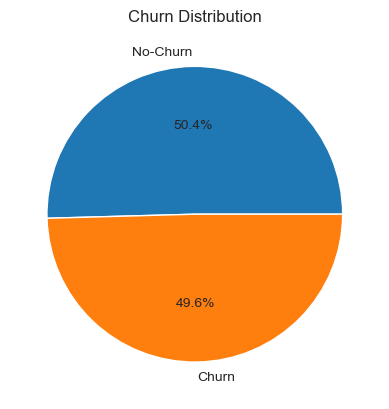

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of each category of 'churn'
churn_counts = churn_data['churn'].value_counts()

# Create a pie chart
sns.set_style("darkgrid")
churn_counts.rename(index={0: 'No-Churn', 1: 'Churn'}, inplace=True)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Churn Distribution')

# Show the chart
plt.show()


In [14]:
Non_churner = churn_data[(churn_data['churn'] ==0) ].count()[1]
churner = churn_data[(churn_data['churn'] ==1) ].count()[1]
print ("Count of Non_churners: "+ str(Non_churner))
print ("Count of churners: "+ str(churner))

Count of Non_churners: 50326
Count of churners: 49317


## Plots for Churn and other Object type variables

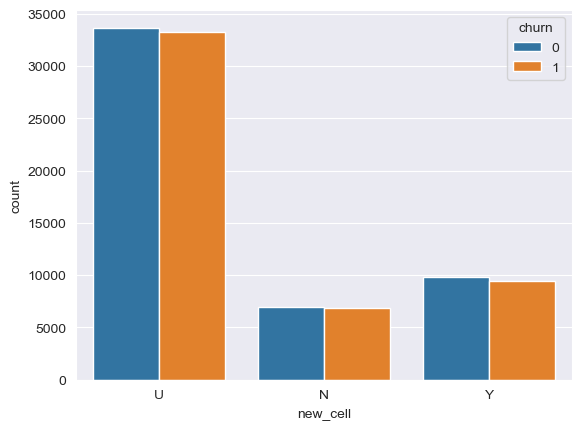

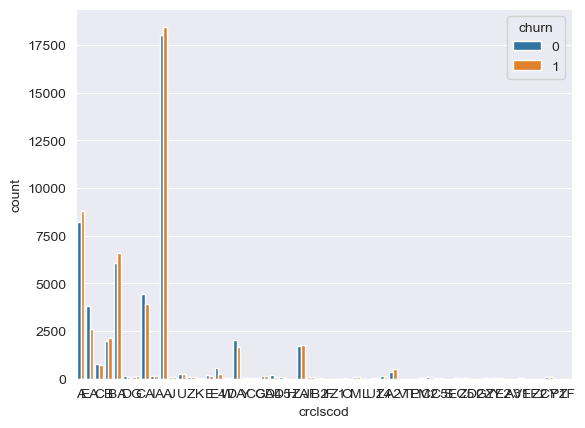

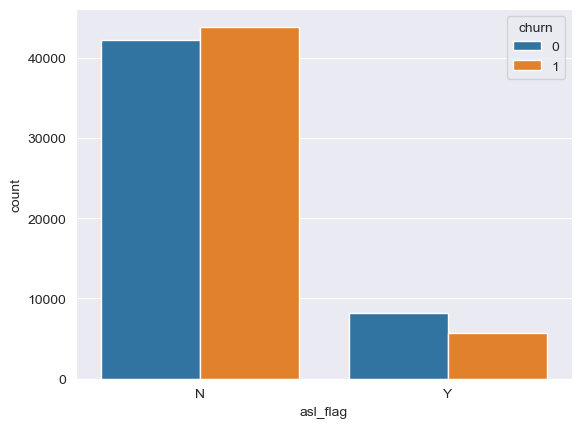

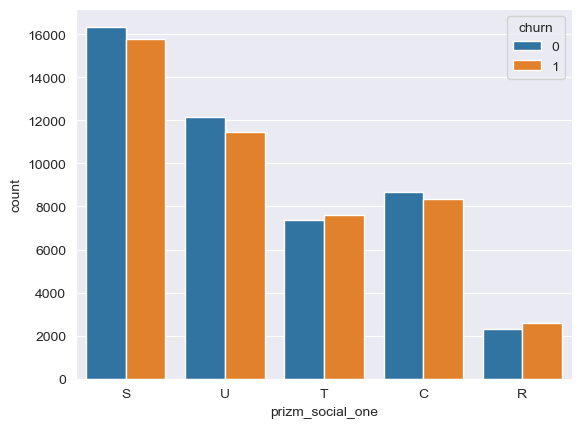

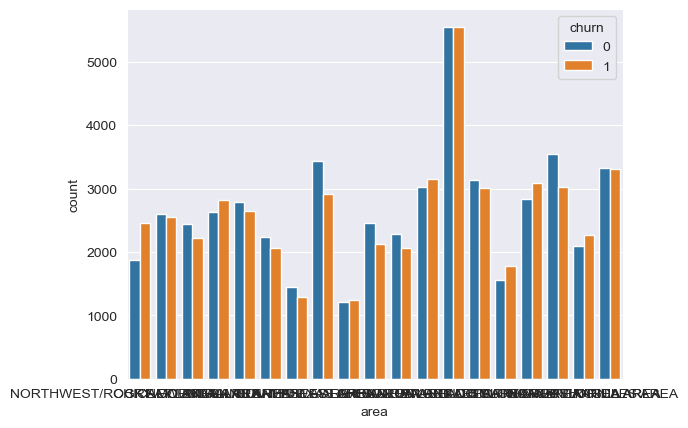

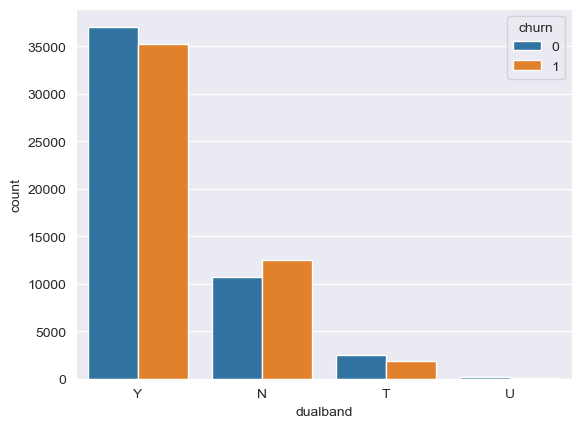

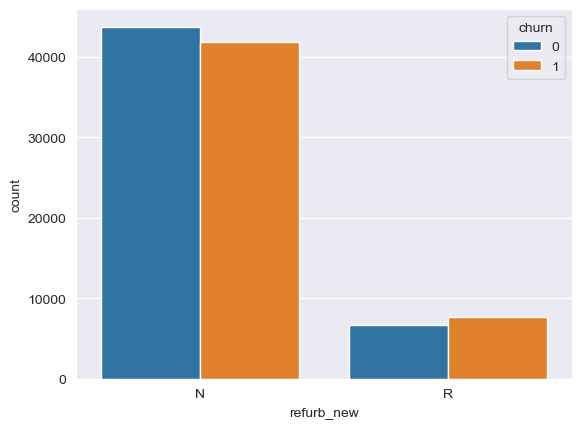

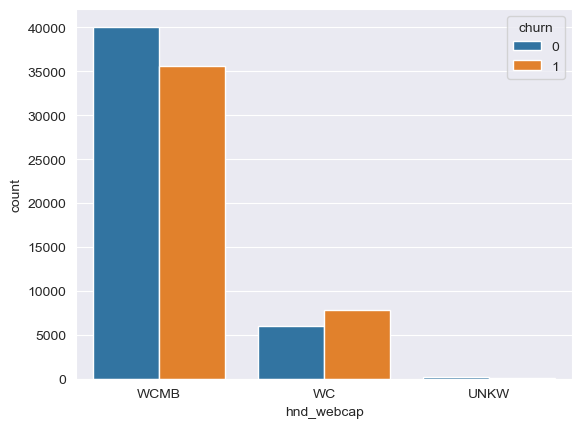

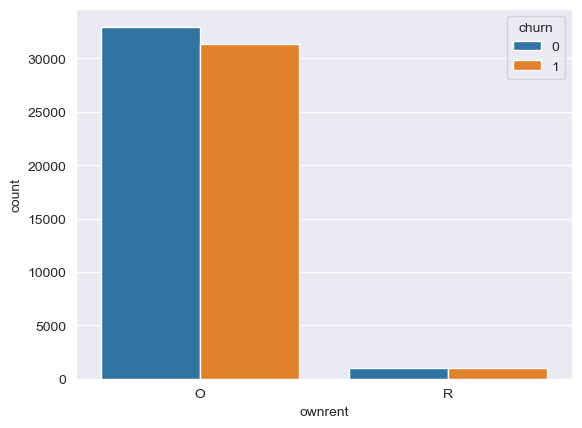

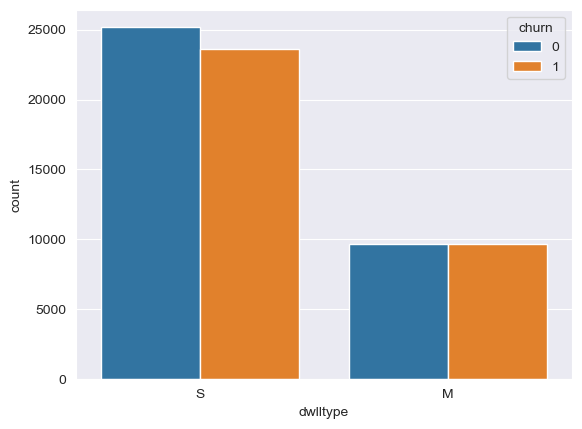

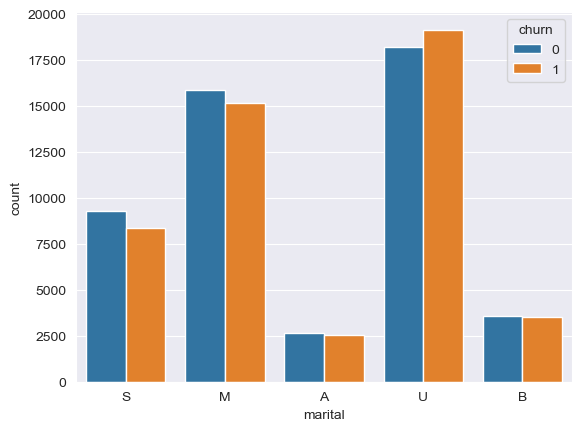

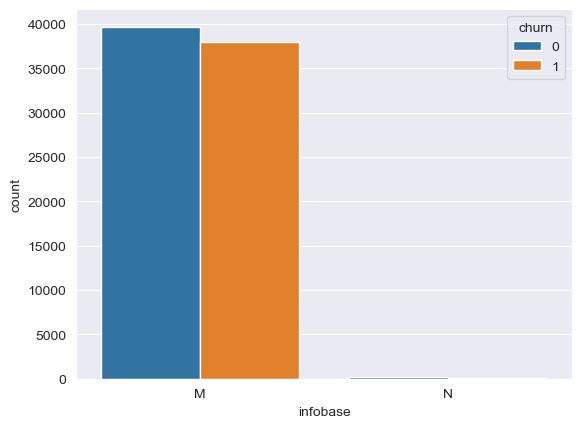

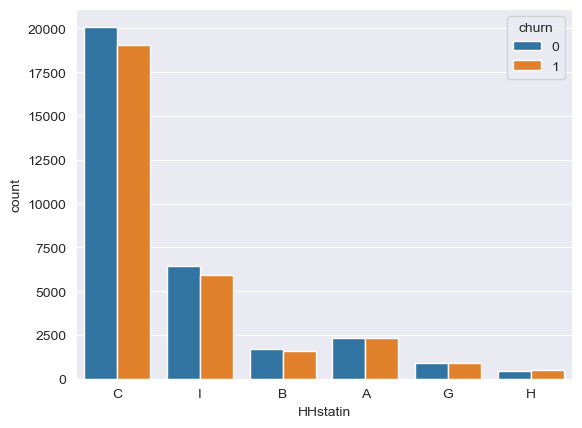

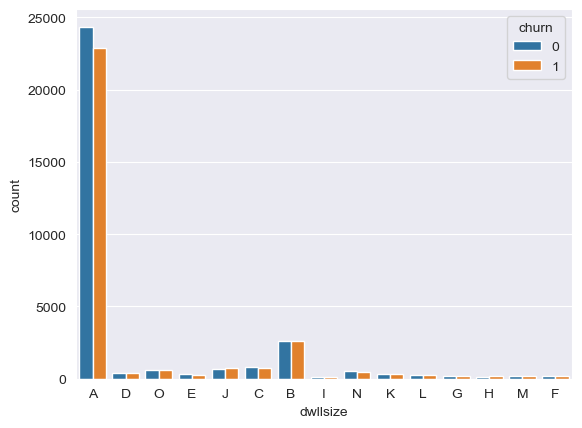

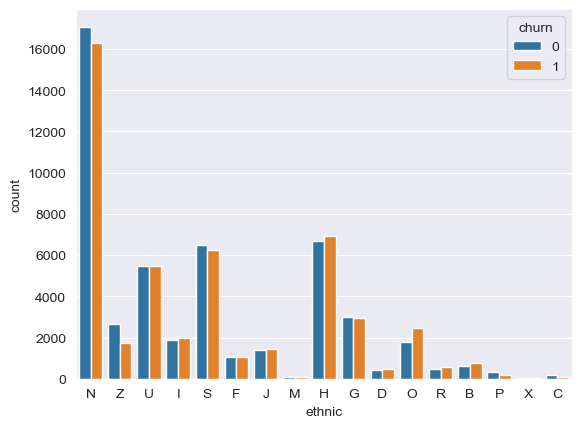

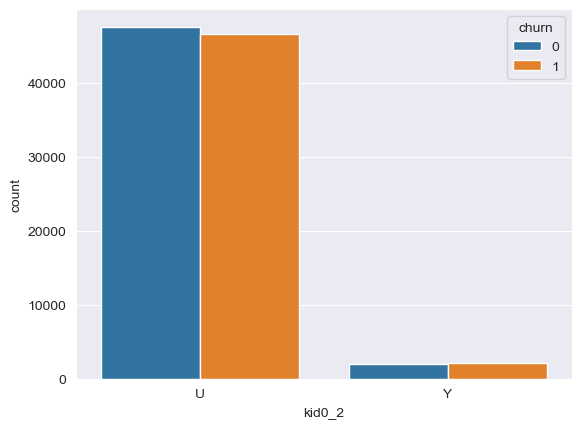

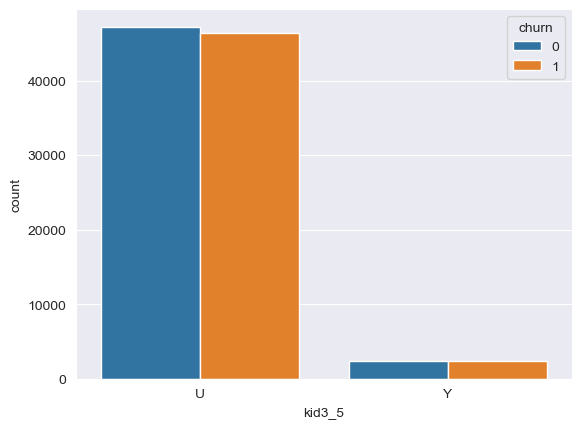

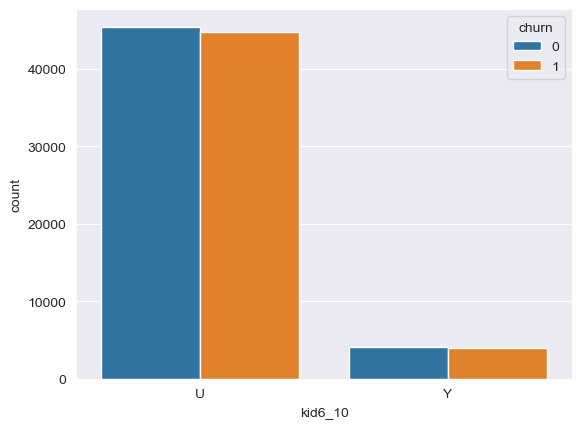

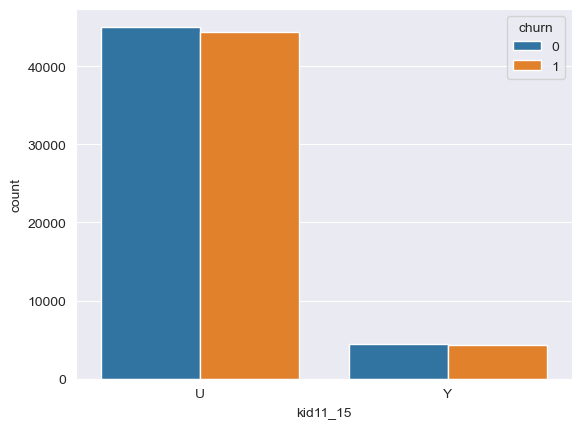

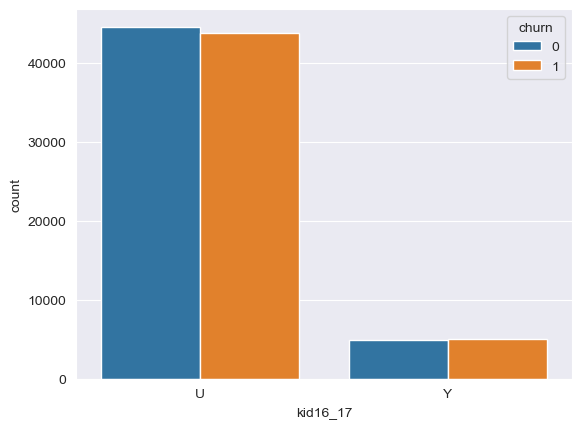

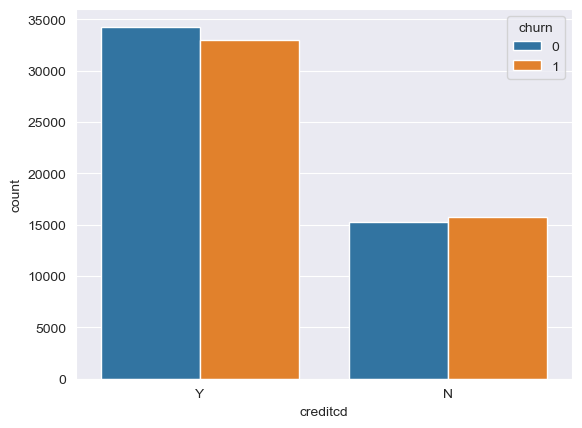

In [15]:
# Create a bar plot for each object attribute
object_cols = churn_data.select_dtypes(include=['object']).columns
for col in object_cols:
    sns.countplot(x=col, hue='churn', data=churn_data)
    plt.show()

## Distribution of numeric variables

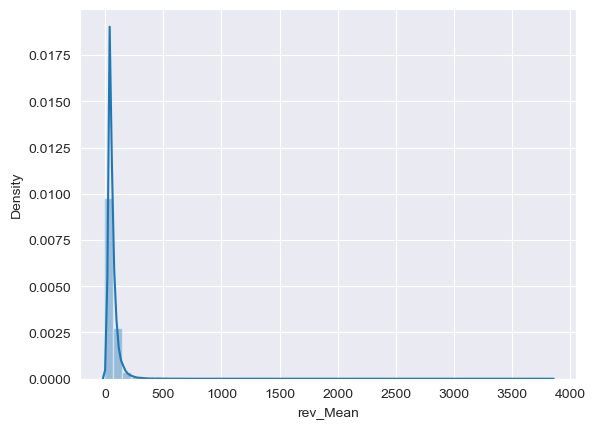

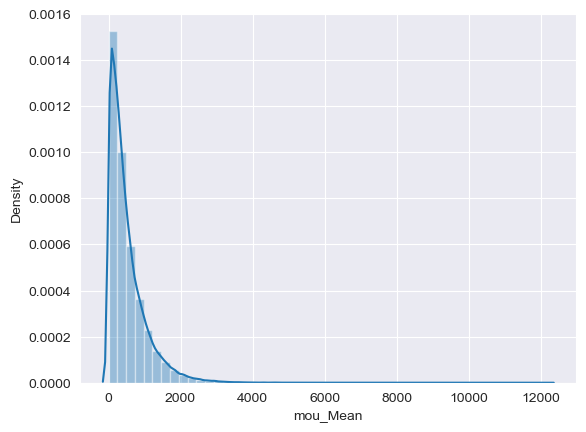

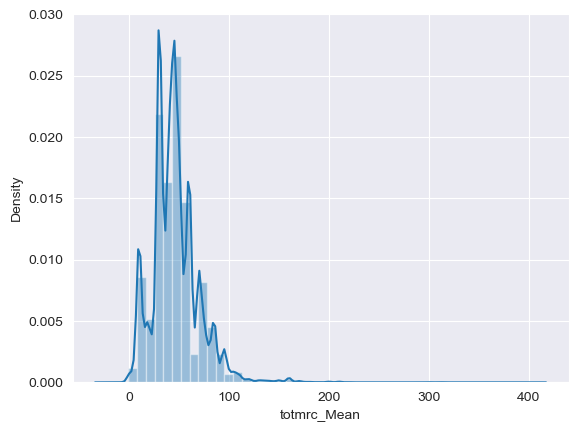

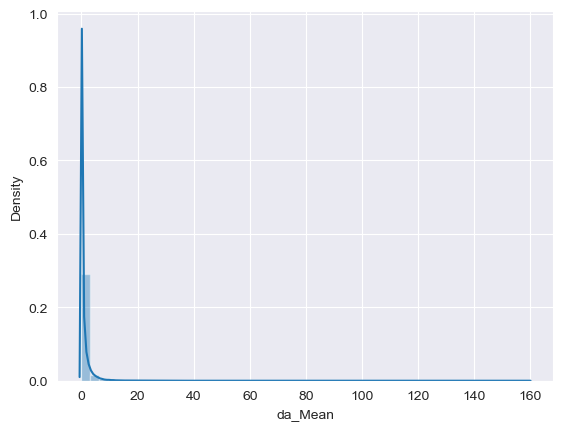

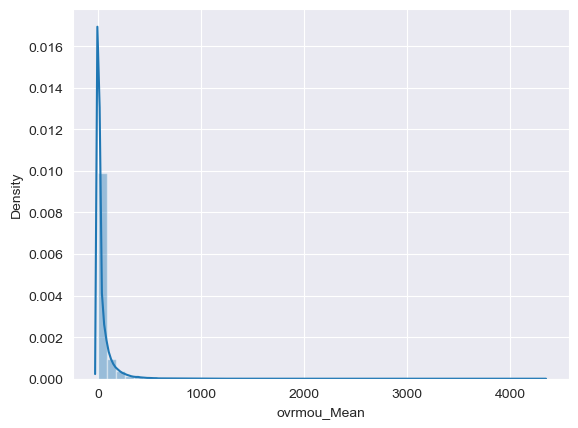

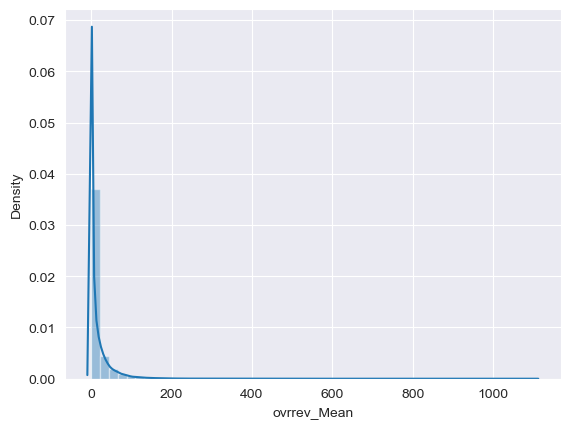

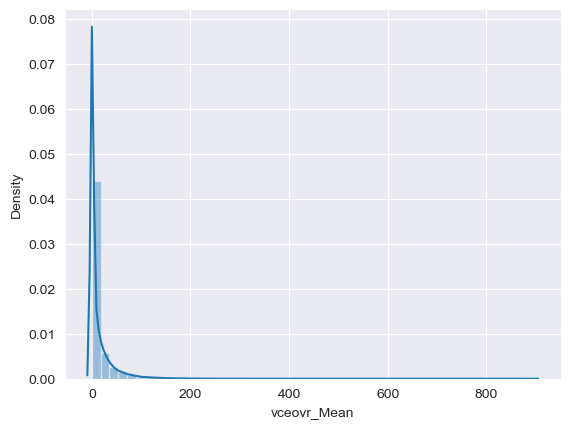

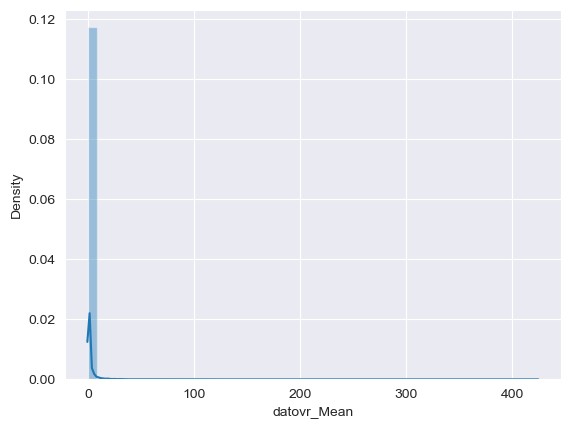

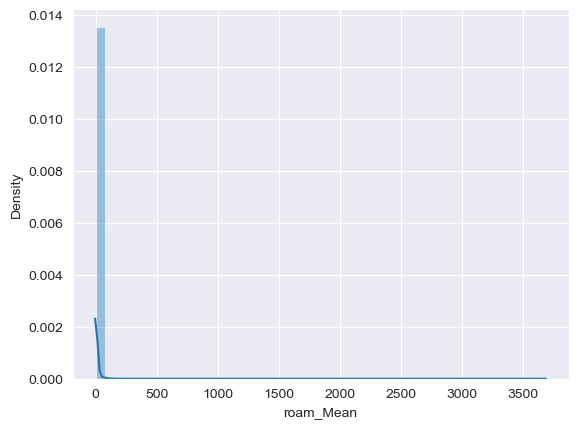

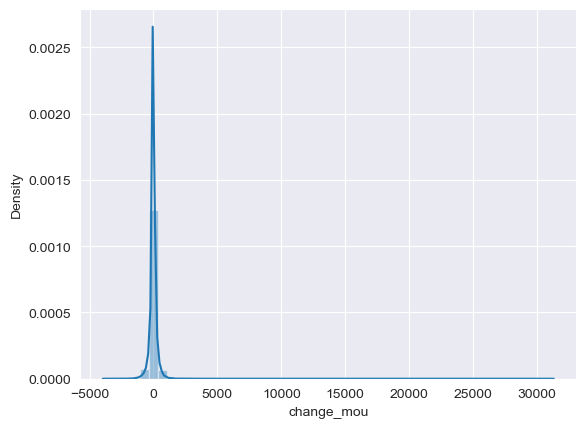

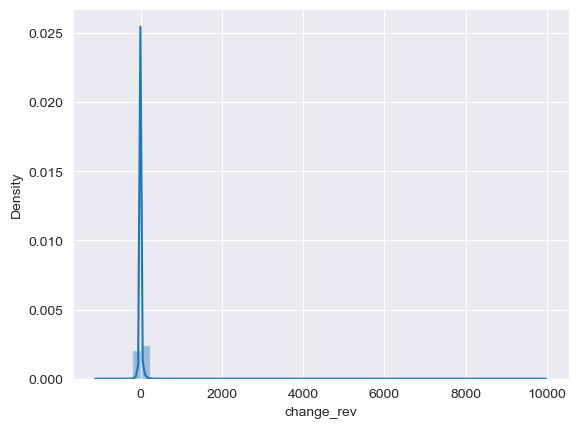

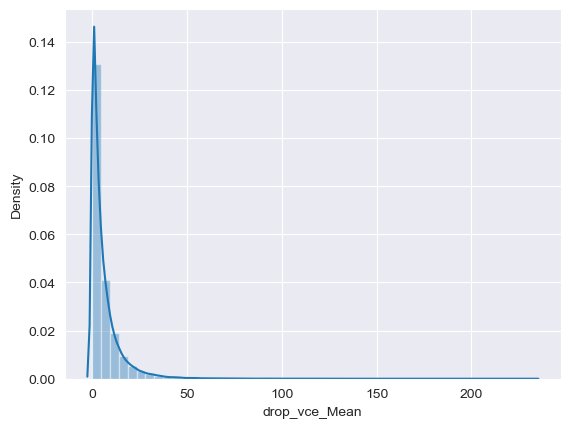

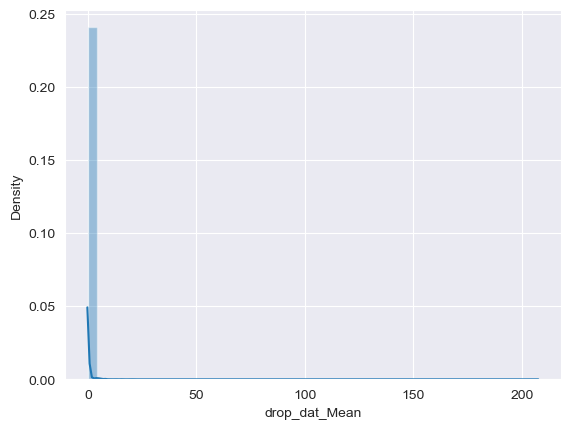

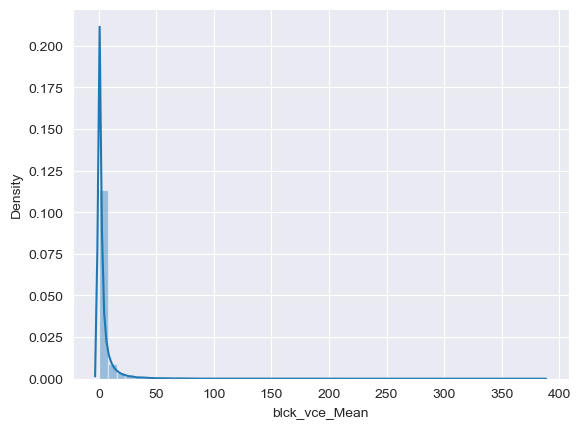

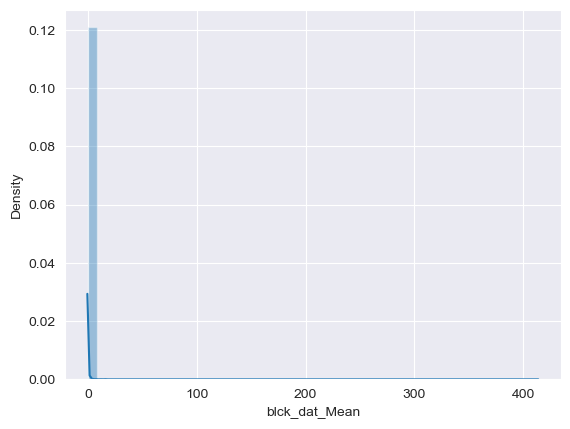

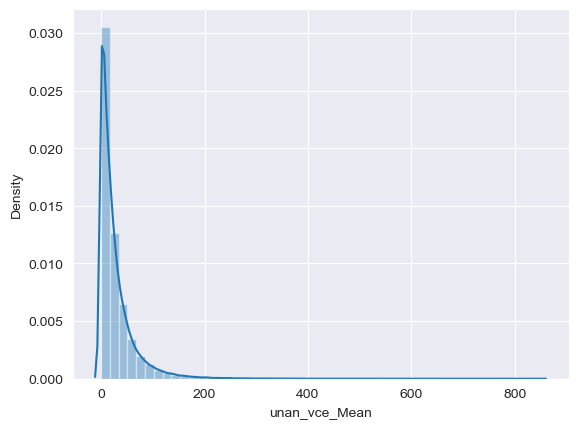

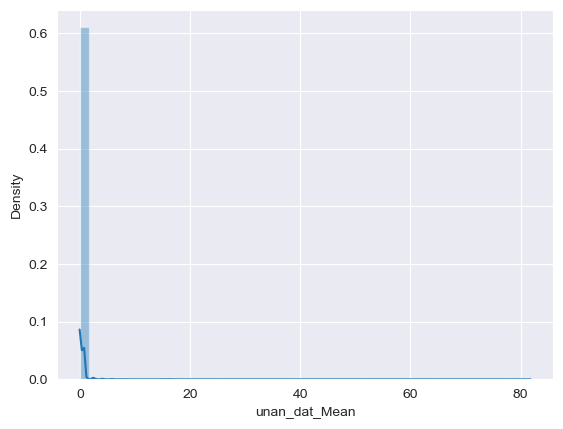

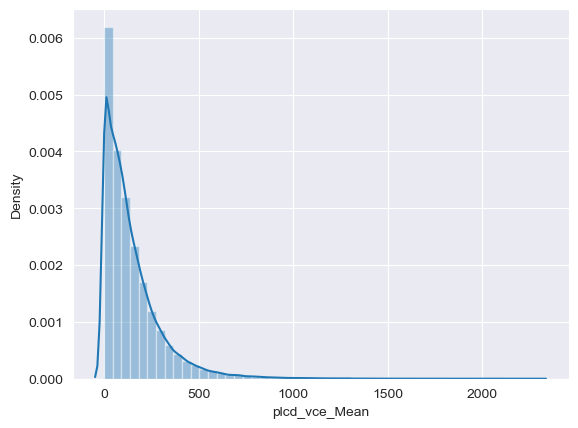

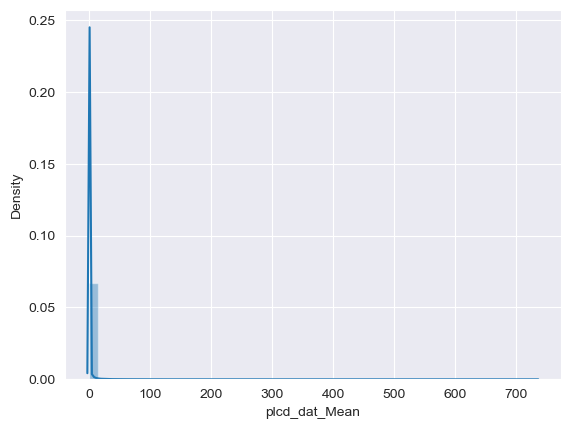

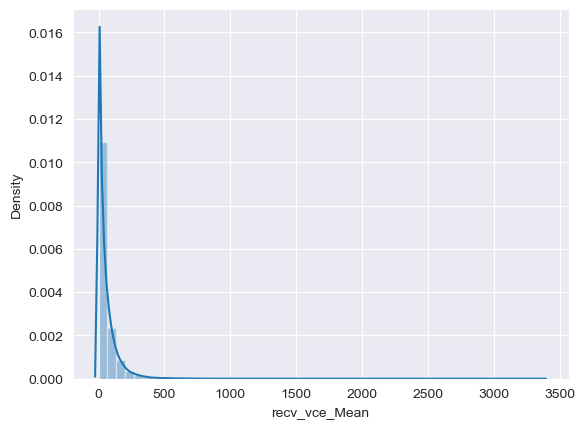

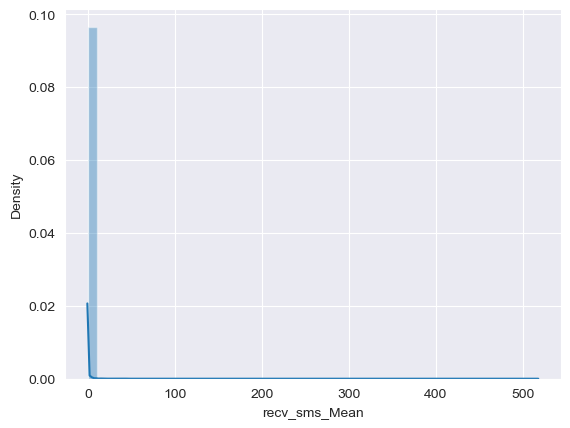

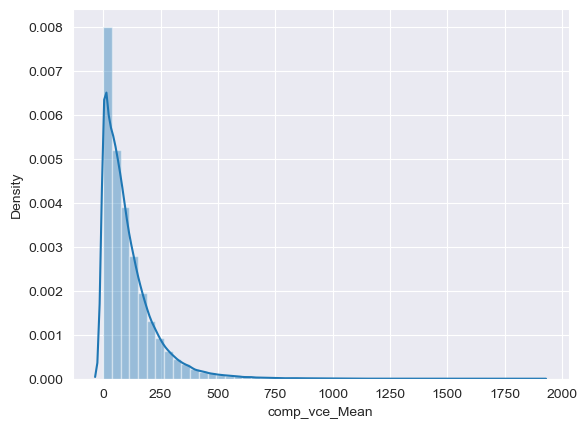

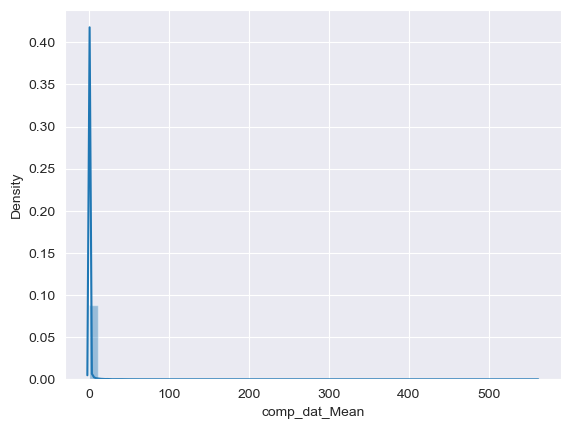

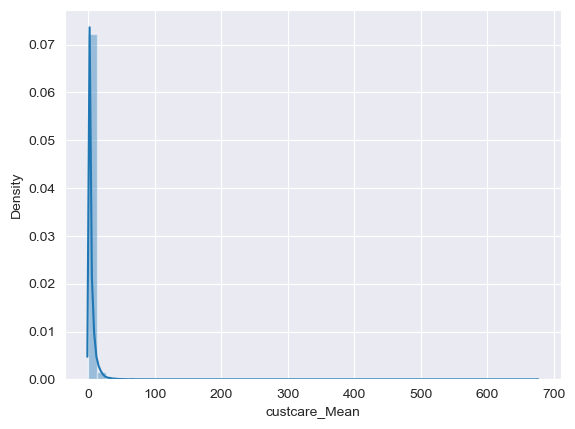

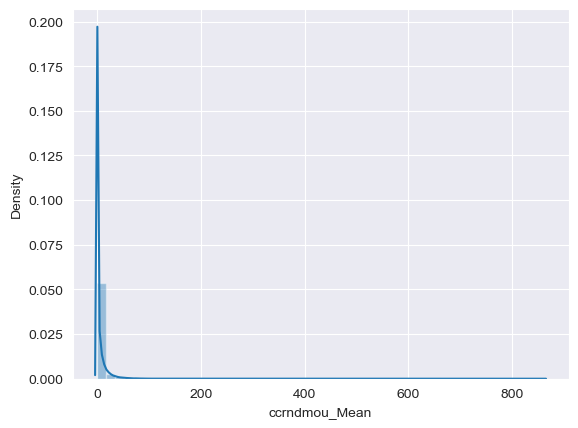

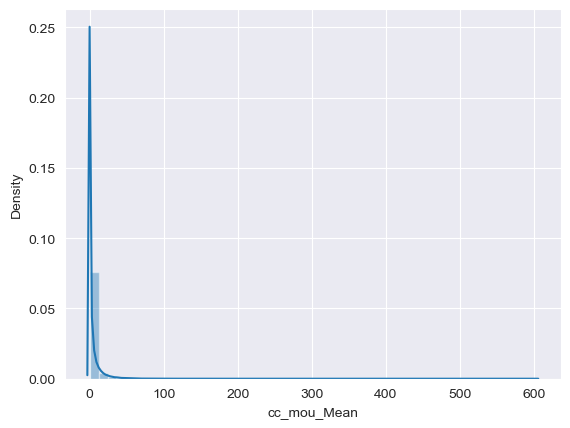

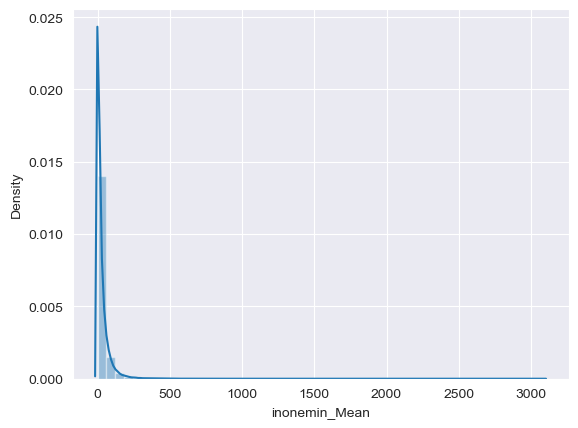

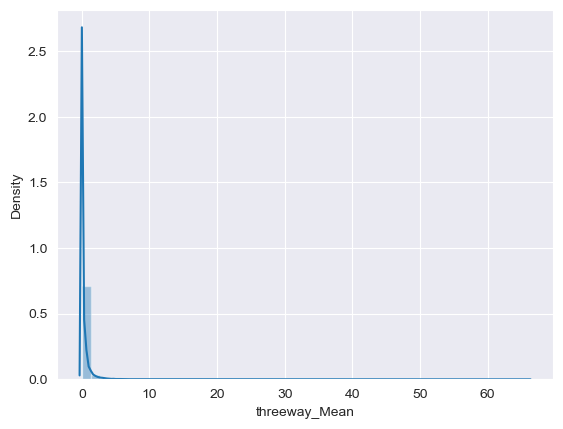

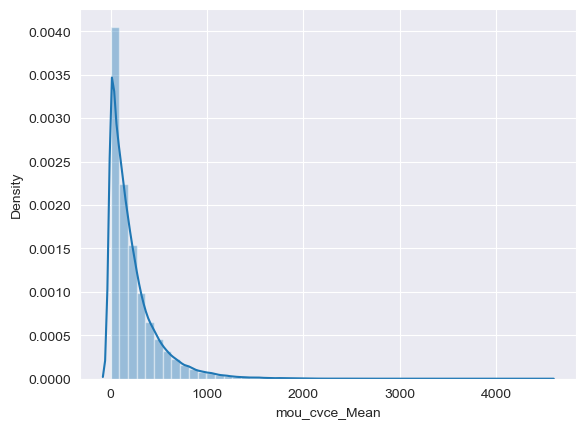

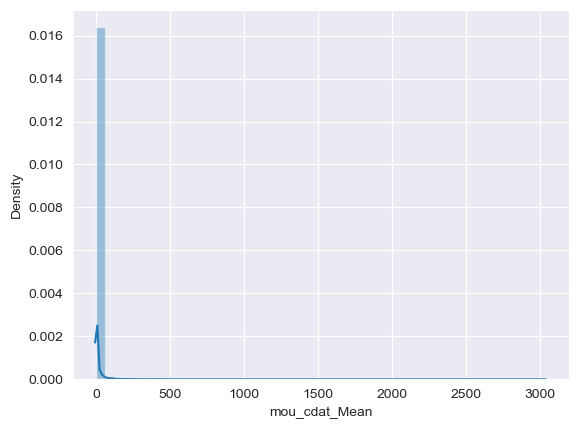

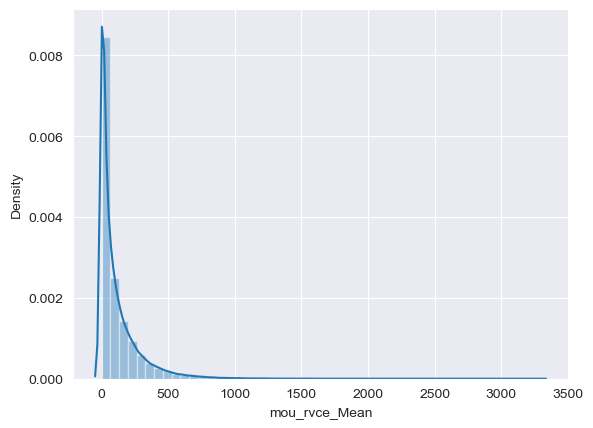

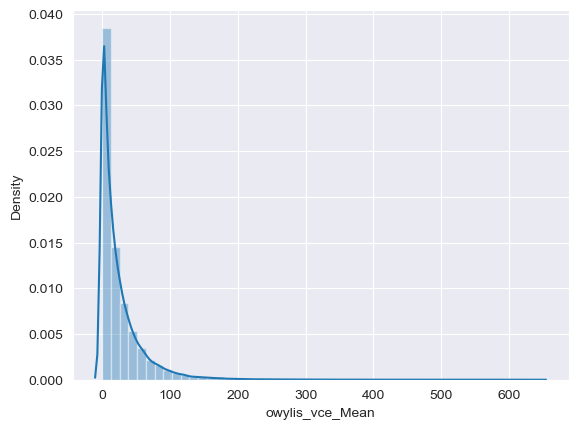

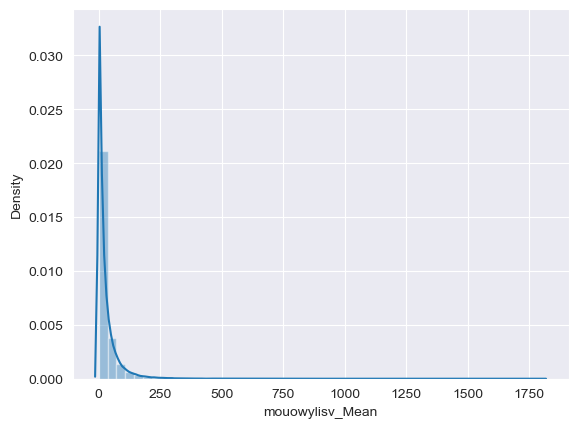

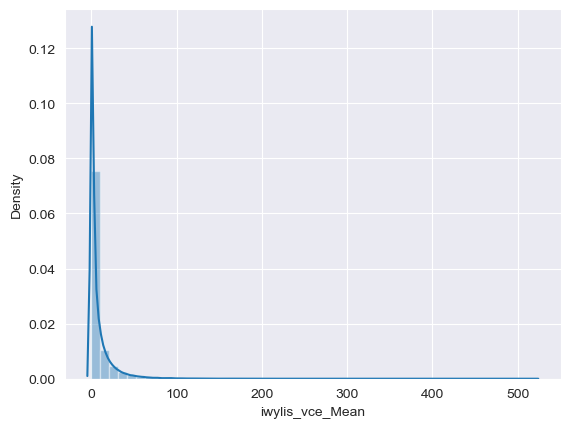

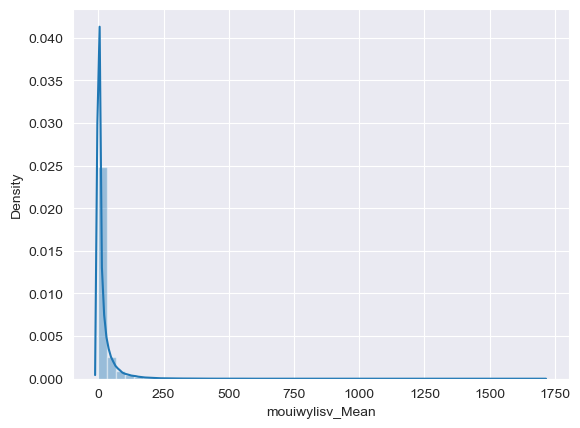

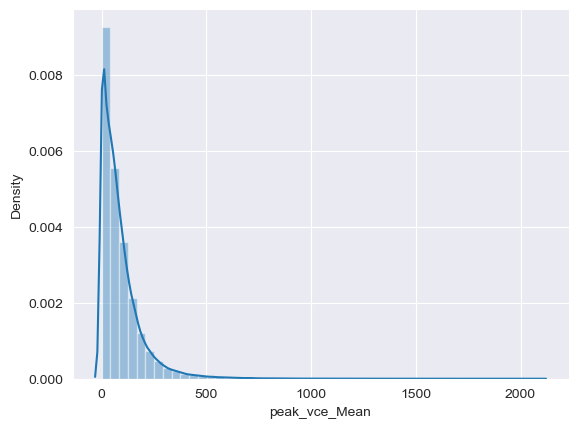

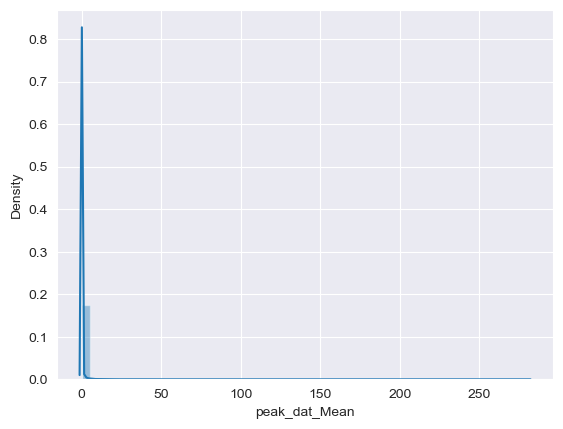

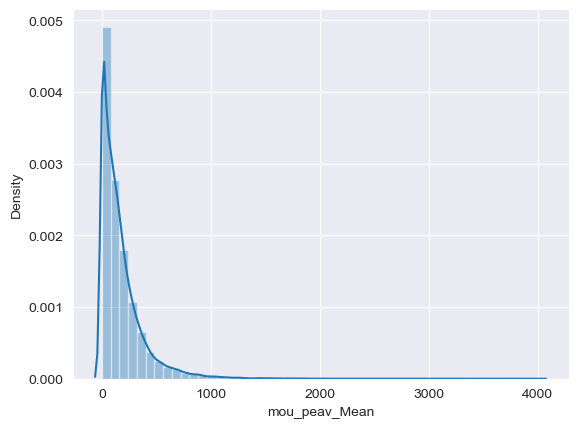

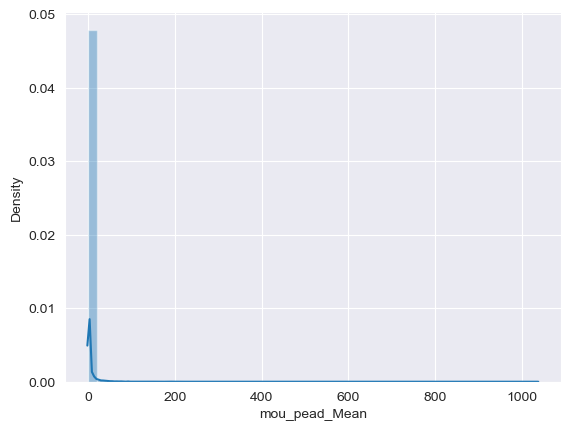

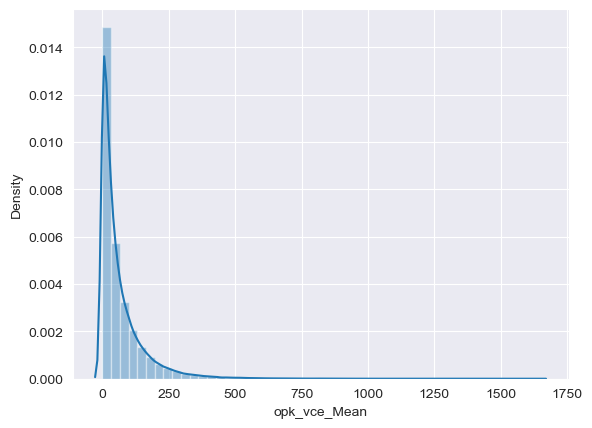

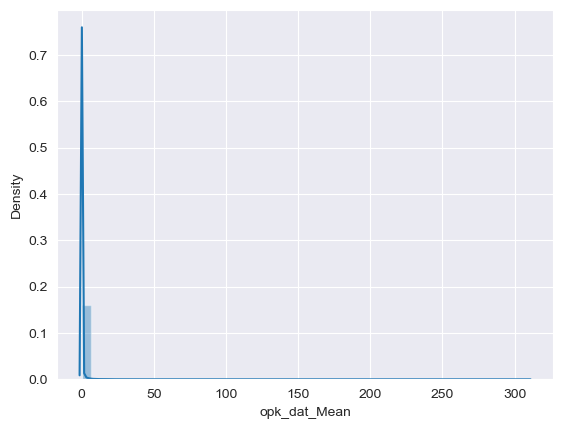

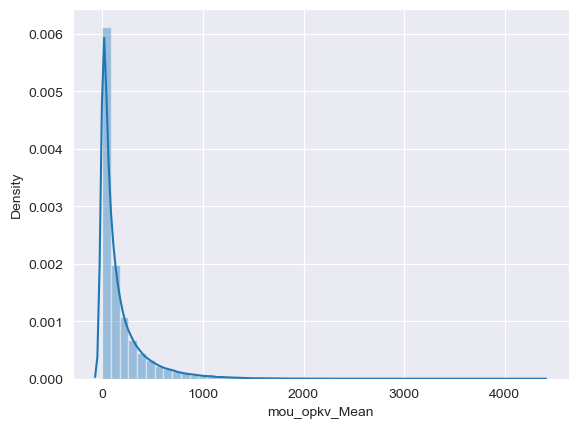

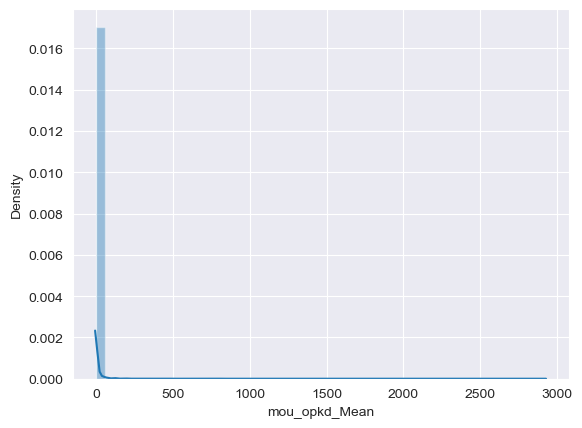

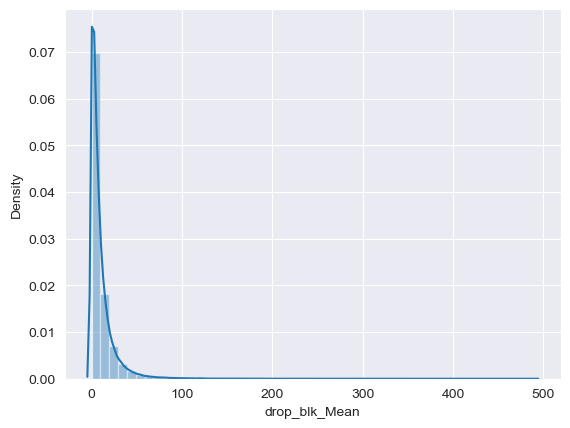

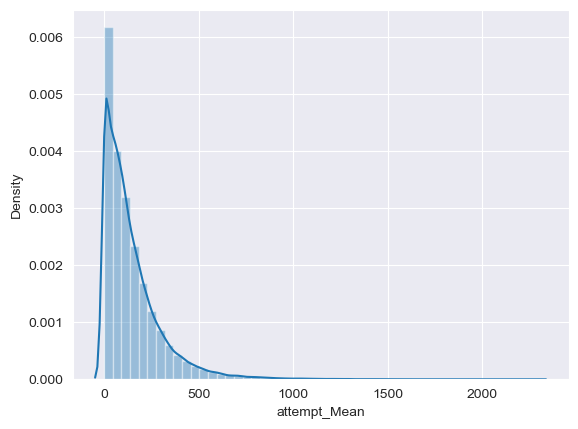

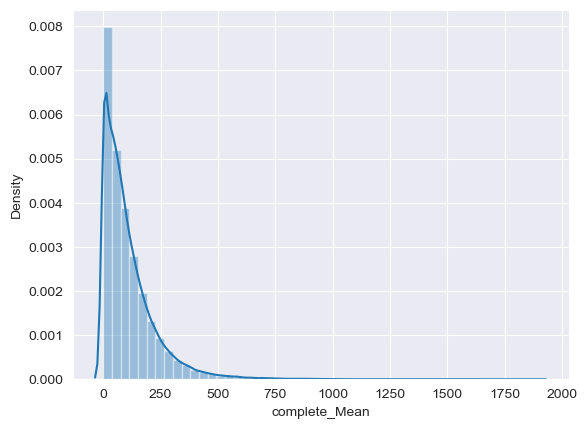

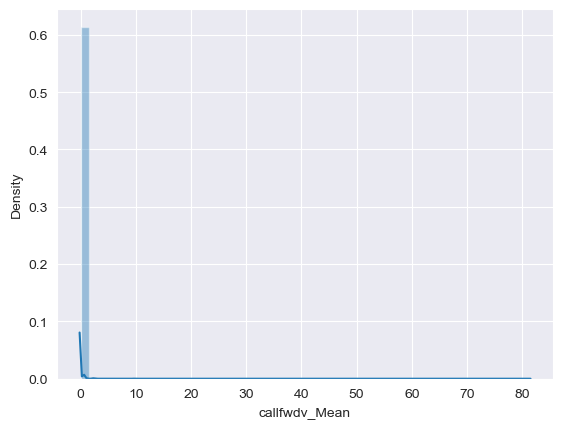

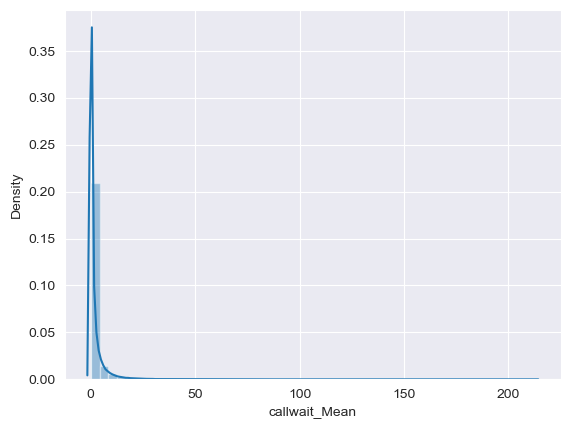

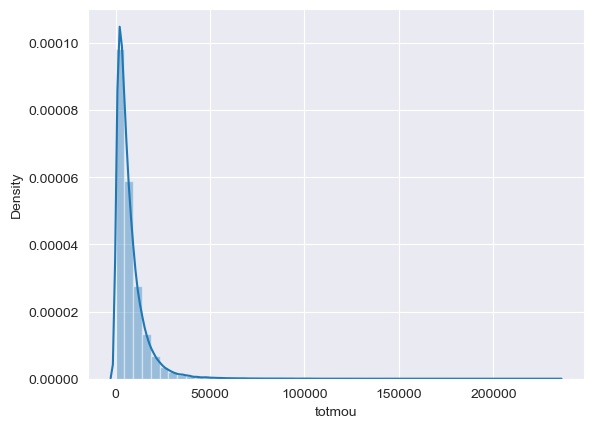

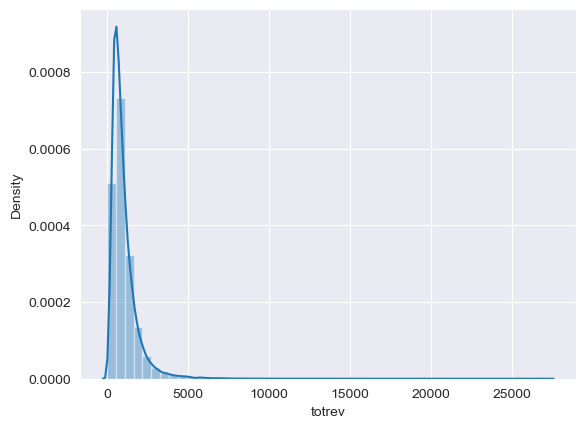

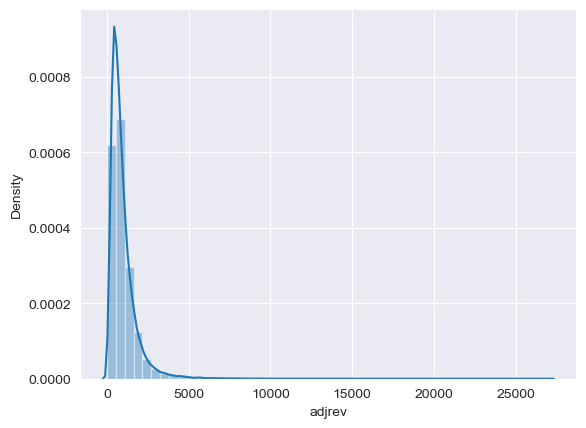

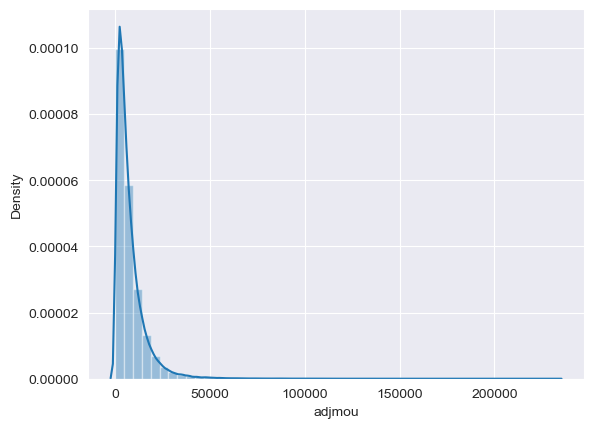

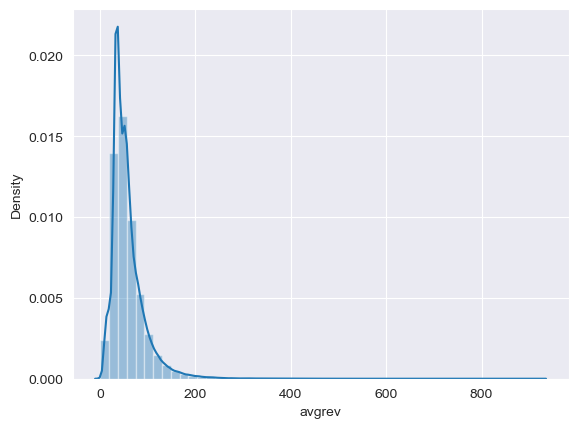

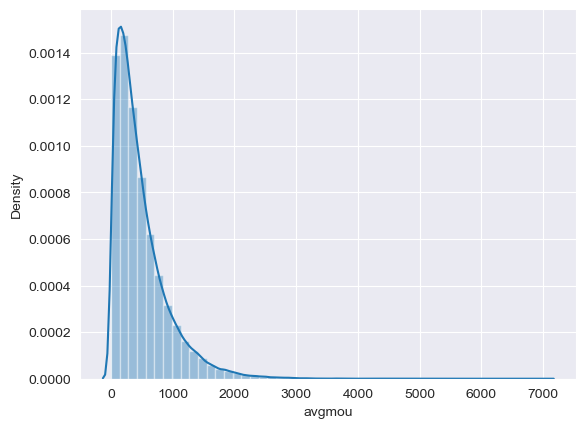

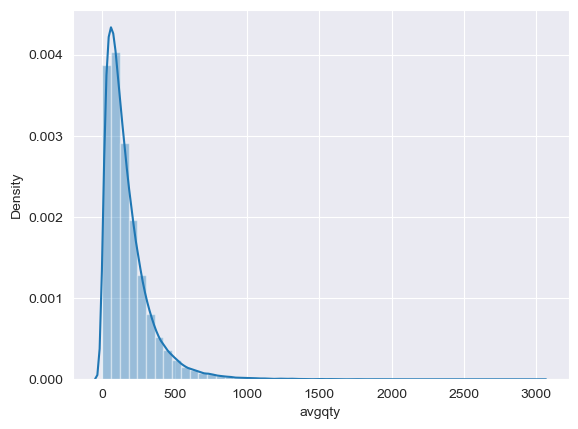

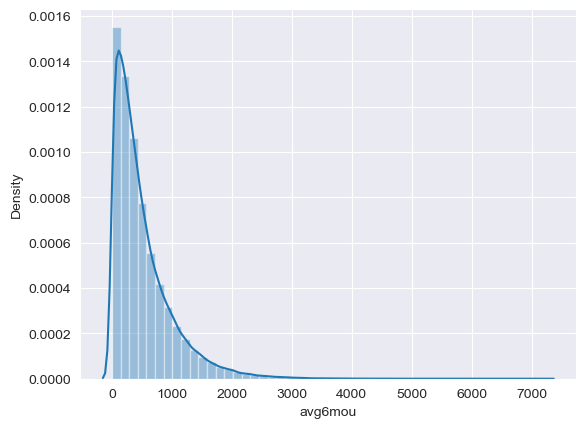

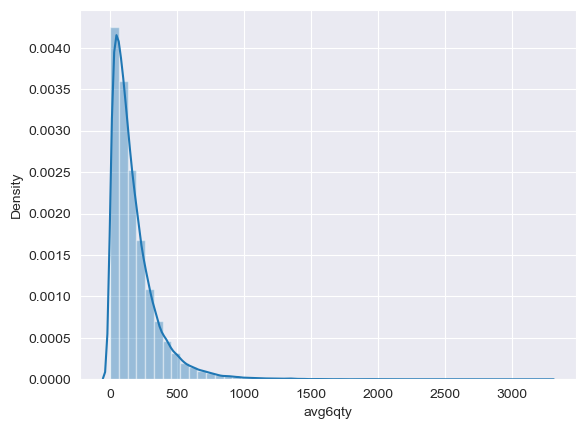

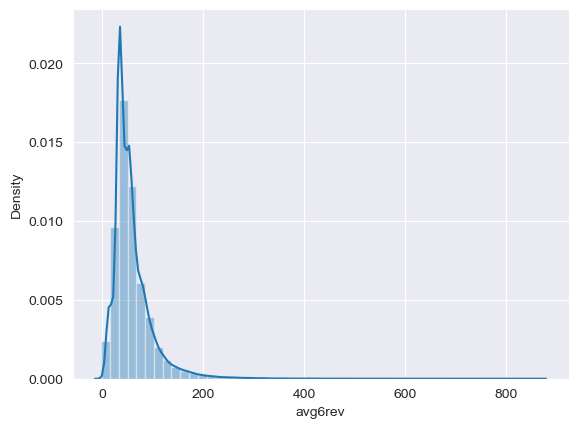

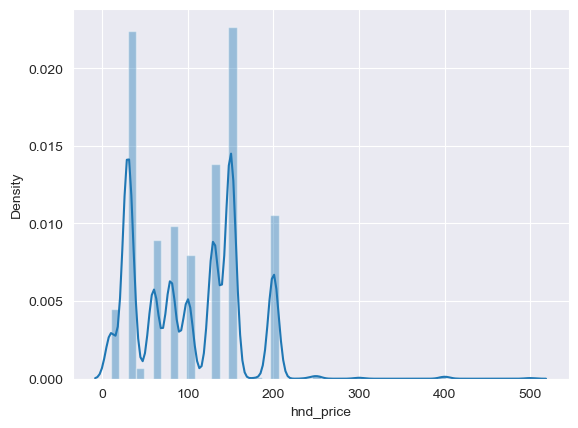

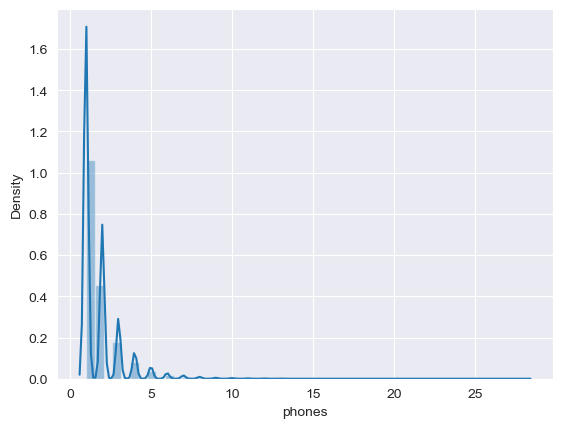

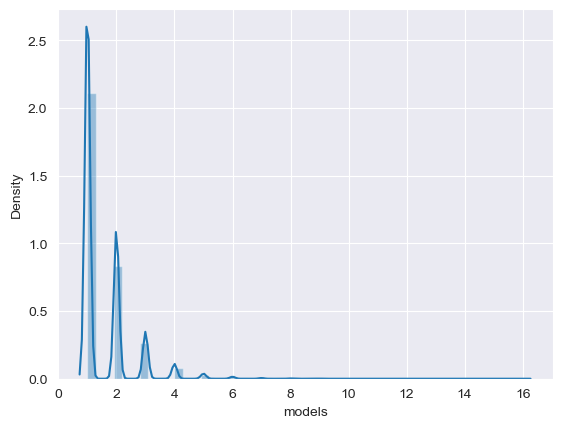

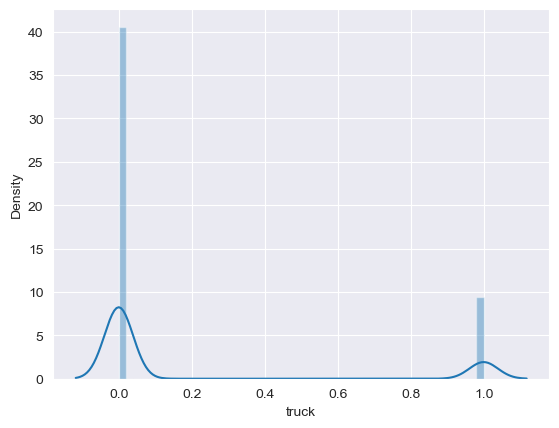

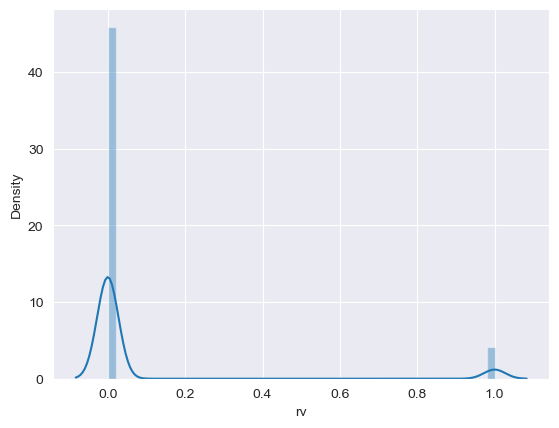

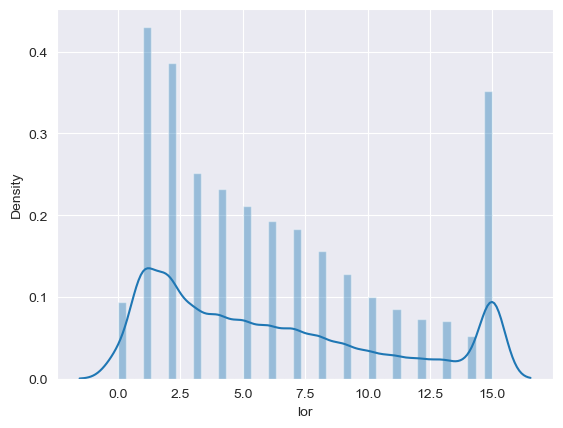

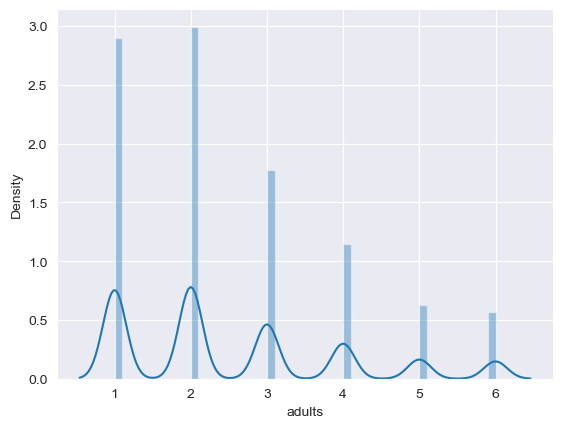

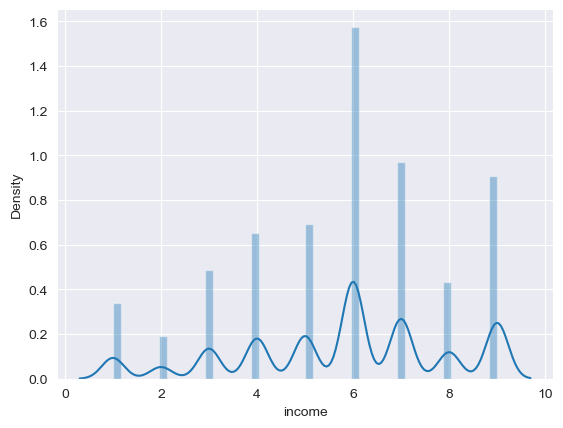

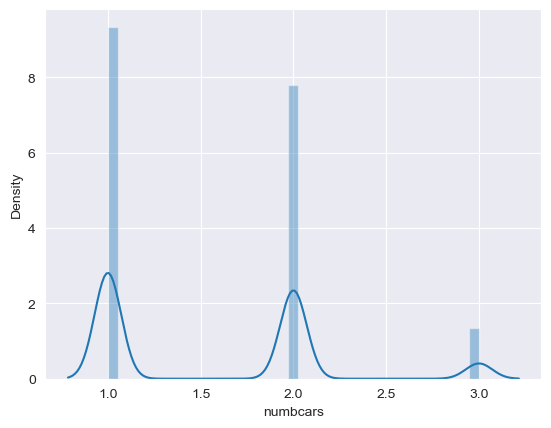

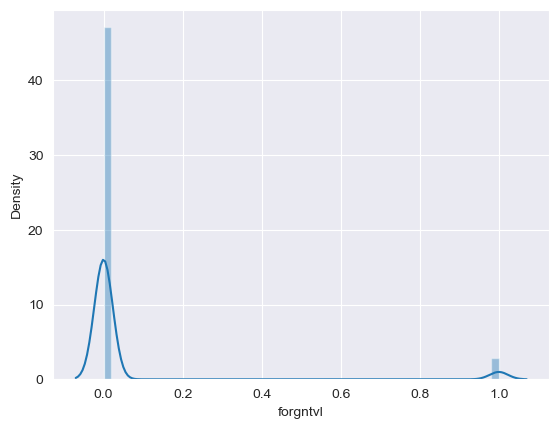

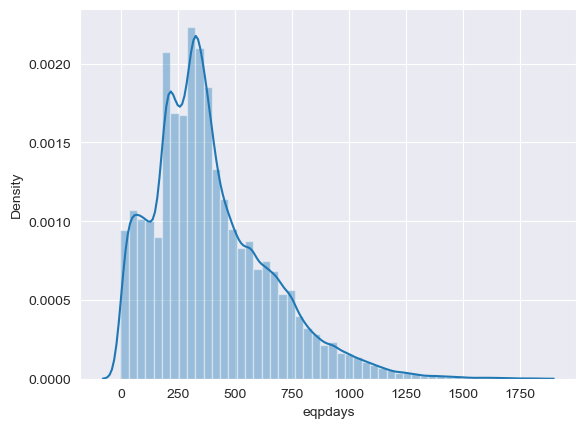

In [16]:
import seaborn as sns

# Get only the numeric columns from the dataset
numeric_cols = churn_data.select_dtypes(include=['float64'])

# Iterate over the columns and plot a distribution plot for each
for col in numeric_cols:
    sns.distplot(numeric_cols[col])
    plt.show()


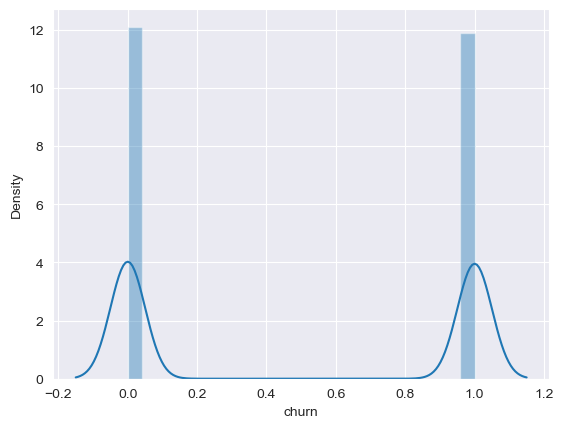

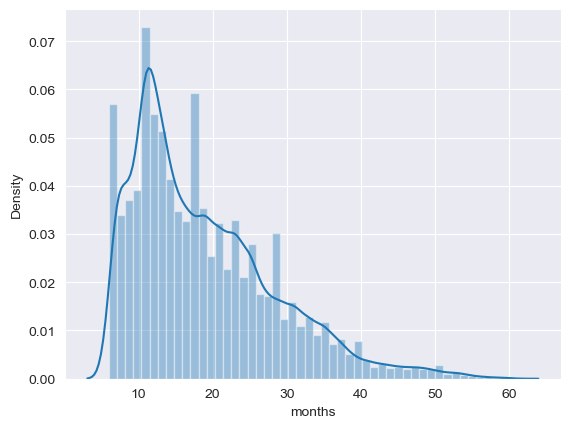

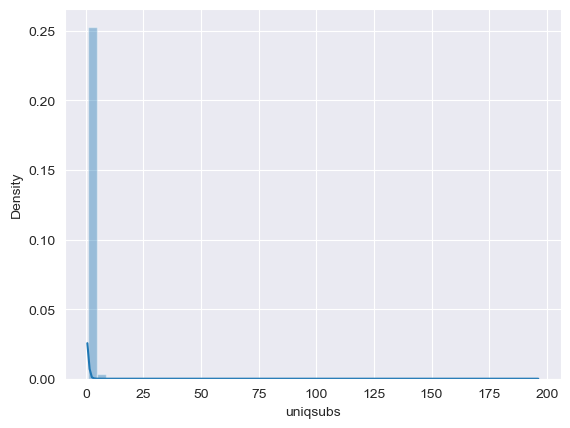

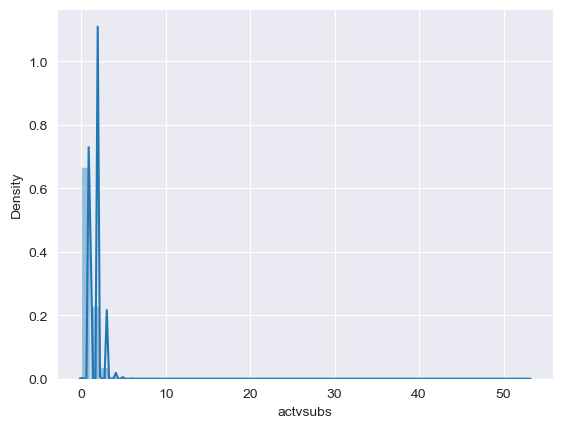

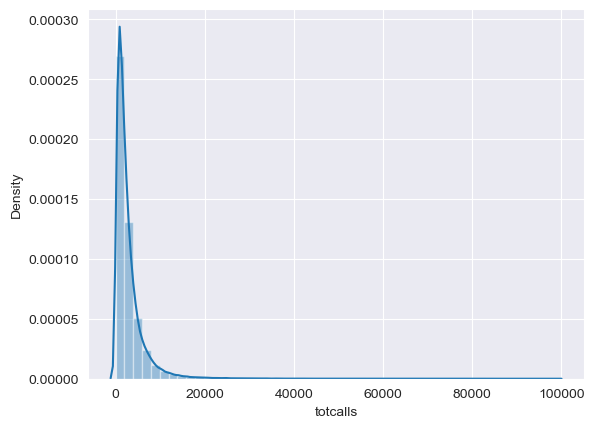

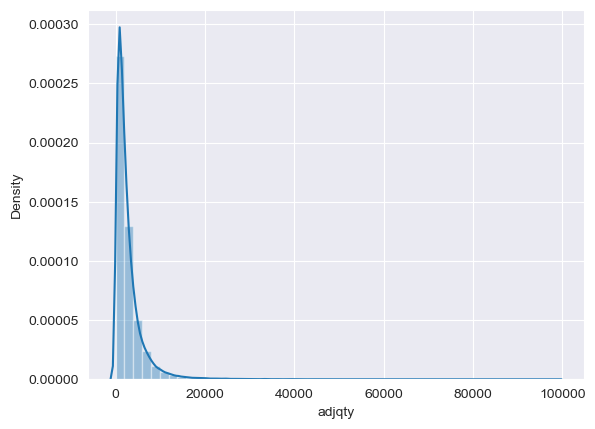

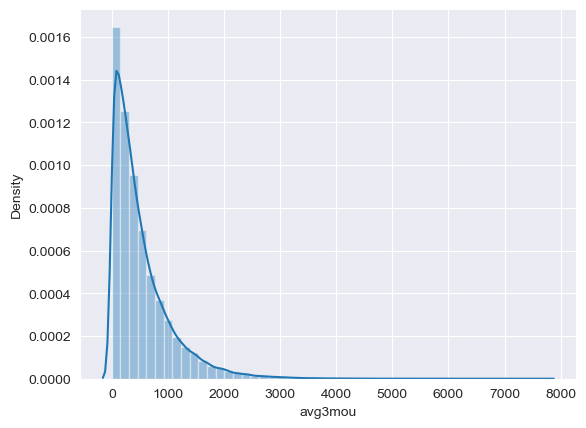

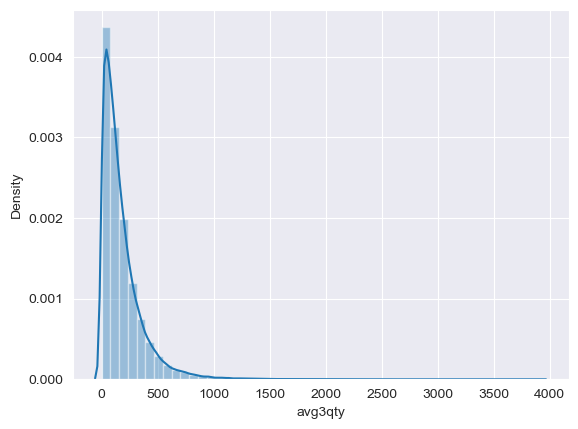

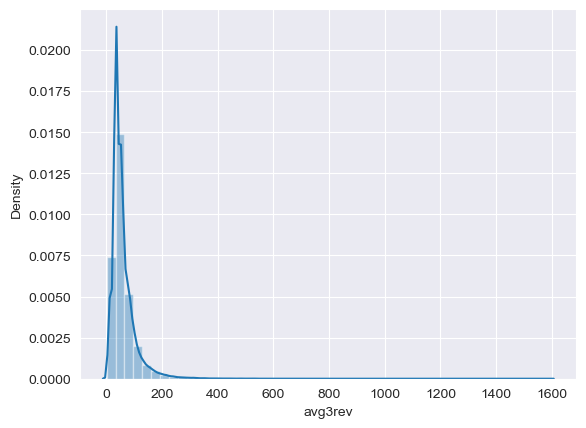

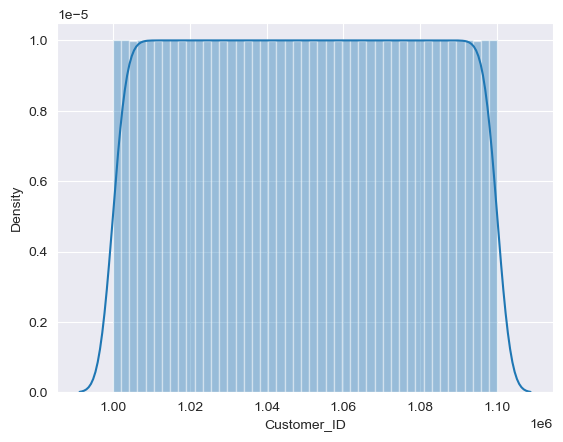

In [17]:
import seaborn as sns

# Get only the numeric columns from the dataset
numeric_cols = churn_data.select_dtypes(include=['int64'])

# Iterate over the columns and plot a distribution plot for each
for col in numeric_cols:
    sns.distplot(numeric_cols[col])
    plt.show()


## Check for Multicollinearity

In [18]:
# Create correlation matrix
corr_matrix = churn_data.corr().abs()
#print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

# Find index of feature columns with correlation greater than equal to 0.8
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

print('\n',"Count of high-correlated attributes: ", len(to_drop),'\n')
print(to_drop)

                 rev_Mean  mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  \
rev_Mean              NaN  0.706029     0.602148  0.403806     0.772117   
mou_Mean              NaN       NaN     0.575567  0.394583     0.575611   
totmrc_Mean           NaN       NaN          NaN  0.306966     0.200732   
da_Mean               NaN       NaN          NaN       NaN     0.304596   
ovrmou_Mean           NaN       NaN          NaN       NaN          NaN   
ovrrev_Mean           NaN       NaN          NaN       NaN          NaN   
vceovr_Mean           NaN       NaN          NaN       NaN          NaN   
datovr_Mean           NaN       NaN          NaN       NaN          NaN   
roam_Mean             NaN       NaN          NaN       NaN          NaN   
change_mou            NaN       NaN          NaN       NaN          NaN   
change_rev            NaN       NaN          NaN       NaN          NaN   
drop_vce_Mean         NaN       NaN          NaN       NaN          NaN   
drop_dat_Mean         NaN

In [19]:
corr_matrix = churn_data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

high_corr = upper.where(corr_matrix >= 0.9)
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['attribute1', 'attribute2', 'correlation']
high_corr_pairs = high_corr_pairs.query('attribute1 != attribute2')
print(high_corr_pairs)

       attribute1     attribute2  correlation
0        rev_Mean        avg3rev     0.927343
1        mou_Mean        avg3mou     0.981123
2        mou_Mean        avg6mou     0.945447
3     ovrmou_Mean    ovrrev_Mean     0.956056
4     ovrmou_Mean    vceovr_Mean     0.953231
5     ovrrev_Mean    vceovr_Mean     0.994752
6   plcd_vce_Mean  comp_vce_Mean     0.985459
7   plcd_vce_Mean   attempt_Mean     0.998398
8   plcd_vce_Mean  complete_Mean     0.983280
9   plcd_dat_Mean  comp_dat_Mean     0.981303
10  plcd_dat_Mean  peak_dat_Mean     0.907054
11  plcd_dat_Mean   opk_dat_Mean     0.922081
12  recv_vce_Mean  inonemin_Mean     0.966703
13  comp_vce_Mean  peak_vce_Mean     0.909891
14  comp_vce_Mean   attempt_Mean     0.983922
15  comp_vce_Mean  complete_Mean     0.997706
16  comp_dat_Mean  peak_dat_Mean     0.922411
17  comp_dat_Mean   opk_dat_Mean     0.941332
18  ccrndmou_Mean    cc_mou_Mean     0.988852
19  mou_cdat_Mean  mou_opkd_Mean     0.958300
20  peak_vce_Mean  complete_Mean  

In [20]:
correlation_with_churn = churn_data.corr()['churn'].abs()
sorted_correlation_with_churn = correlation_with_churn.sort_values()
sorted_correlation_with_churn

rv                 0.000489
recv_sms_Mean      0.000812
datovr_Mean        0.001290
callfwdv_Mean      0.002248
numbcars           0.002392
adjrev             0.002900
totrev             0.003017
blck_dat_Mean      0.004016
truck              0.004097
unan_dat_Mean      0.004727
forgntvl           0.004986
income             0.005260
mou_pead_Mean      0.005566
drop_dat_Mean      0.006223
peak_dat_Mean      0.007580
change_rev         0.007832
adults             0.007968
mou_cdat_Mean      0.008252
mou_opkd_Mean      0.008366
avgrev             0.008780
comp_dat_Mean      0.008882
opk_dat_Mean       0.008898
blck_vce_Mean      0.009023
roam_Mean          0.009324
plcd_dat_Mean      0.009499
rev_Mean           0.010883
avg3rev            0.012702
da_Mean            0.013551
drop_vce_Mean      0.015261
totcalls           0.015780
drop_blk_Mean      0.015851
adjqty             0.016259
totmou             0.016949
adjmou             0.017532
avg6rev            0.018751
actvsubs           0

## Correlation of variables with Target(Churn) variable 

<AxesSubplot:>

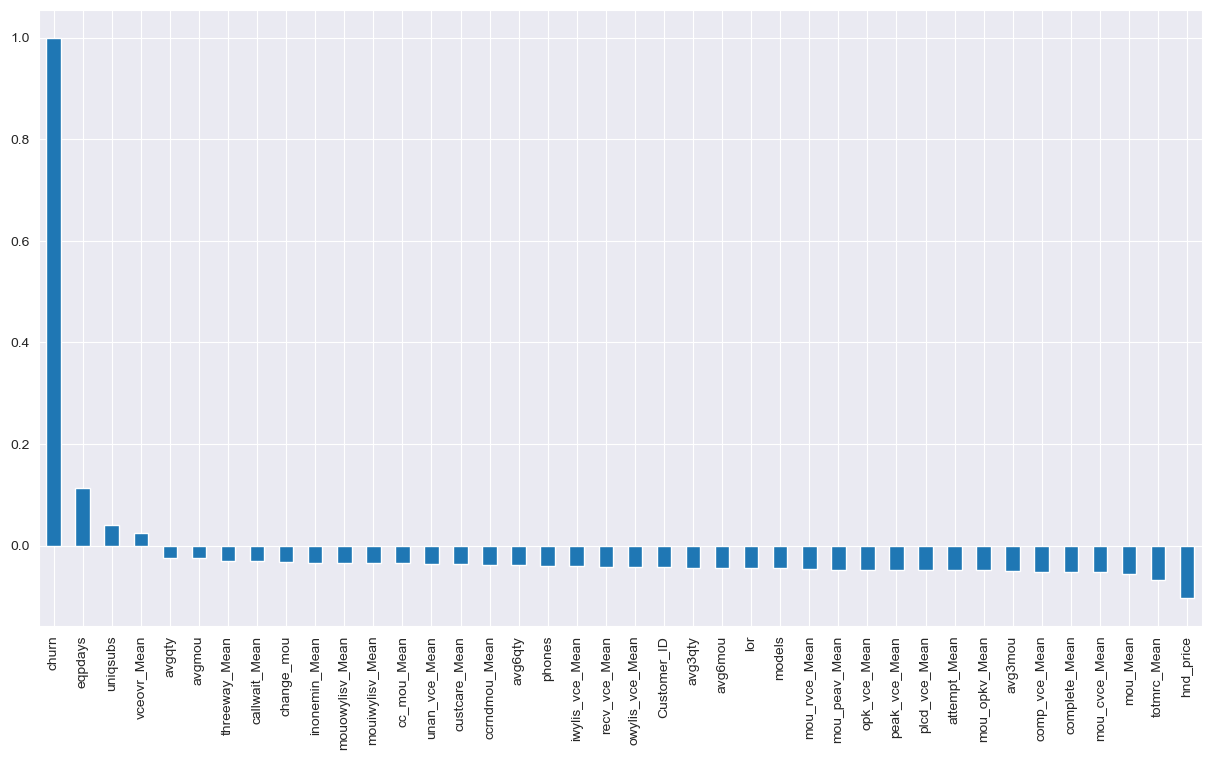

In [21]:
top_40_most_correlated_columns_dict = dict(sorted_correlation_with_churn.tail(40))
top_40_most_correlated_columns = top_40_most_correlated_columns_dict.keys()
# print(sorted(top_40_most_correlated_columns))

# Get Correlation of "churn" with other variables:
plt.figure(figsize=(15,8))
churn_data[top_40_most_correlated_columns].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [22]:
# Drop Customer_ID (unique column)
churn_data.drop(["Customer_ID"], axis = 1, inplace=True) 

In [24]:
churn_data.shape

(100000, 99)

## Attributes dropped based on attributes with more tha 10% missing values

In [23]:
#Drop attributes with >10% missing values
missing_percentage_cap = 10
columns_with_more_than_10_percent_data = []
for col in churn_data.columns:
    if ((churn_data[col].isnull().sum()) / len(churn_data)) * 100 > 10:
        columns_with_more_than_10_percent_data.append(col)
churn_data.drop(columns_with_more_than_10_percent_data, axis=1, inplace=True)

In [24]:
churn_data.shape

(100000, 89)

## Attributes dropped based on Collinearity>0.8,

In [25]:
churn_data.drop(to_drop, axis=1,inplace=True)

In [26]:
churn_data.shape

(100000, 53)

In [27]:
churn_data.isna().any(axis=1).sum()

10015

In [28]:
objects_with_missing_values = churn_data.select_dtypes(include=['object']).isna().sum().sort_values(ascending = False)
objects_with_missing_values

prizm_social_one    7388
marital             1732
ethnic              1732
kid0_2              1732
kid3_5              1732
kid6_10             1732
kid11_15            1732
kid16_17            1732
creditcd            1732
area                  40
dualband               1
refurb_new             1
new_cell               0
crclscod               0
asl_flag               0
dtype: int64

In [29]:
# Find number of missing values in each row
missing_values_per_row = churn_data.isna().sum(axis=1)

# Print the number of missing values for each row
print(missing_values_per_row)

0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         1
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        1
50        0
51        0
52        0
53        1
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83  

In [30]:
# Find number of columns in the dataframe
total_columns = churn_data.shape[1]

# Find rows with more than 40% of columns missing
rows_with_missing = missing_values_per_row[missing_values_per_row > (0.4 * total_columns)]

# Print the number of missing values for each row
print(rows_with_missing.sum())

0


In [31]:
churn_data.select_dtypes(include=[np.number]).isna().sum().sort_values(ascending = False)

forgntvl           1732
rv                 1732
truck              1732
change_mou          891
change_rev          891
hnd_price           847
rev_Mean            357
mou_Mean            357
totmrc_Mean         357
da_Mean             357
ovrmou_Mean         357
datovr_Mean         357
roam_Mean           357
phones                1
eqpdays               1
plcd_dat_Mean         0
months                0
drop_vce_Mean         0
drop_dat_Mean         0
blck_vce_Mean         0
blck_dat_Mean         0
unan_vce_Mean         0
avgrev                0
totcalls              0
actvsubs              0
uniqsubs              0
churn                 0
recv_vce_Mean         0
callwait_Mean         0
callfwdv_Mean         0
mou_pead_Mean         0
mouiwylisv_Mean       0
iwylis_vce_Mean       0
mou_cdat_Mean         0
unan_dat_Mean         0
custcare_Mean         0
recv_sms_Mean         0
threeway_Mean         0
dtype: int64

## Missing value imputation with mean and mode(for simplicity)

In [32]:
def impute_columns_with_missing_values(df: pd.DataFrame = None):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())
    return df

In [33]:
churn_imputed_data = impute_columns_with_missing_values(churn_data)

In [34]:
churn_imputed_data.isna().sum()

rev_Mean            0
mou_Mean            0
totmrc_Mean         0
da_Mean             0
ovrmou_Mean         0
datovr_Mean         0
roam_Mean           0
change_mou          0
change_rev          0
drop_vce_Mean       0
drop_dat_Mean       0
blck_vce_Mean       0
blck_dat_Mean       0
unan_vce_Mean       0
unan_dat_Mean       0
plcd_dat_Mean       0
recv_vce_Mean       0
recv_sms_Mean       0
custcare_Mean       0
threeway_Mean       0
mou_cdat_Mean       0
iwylis_vce_Mean     0
mouiwylisv_Mean     0
mou_pead_Mean       0
callfwdv_Mean       0
callwait_Mean       0
churn               0
months              0
uniqsubs            0
actvsubs            0
new_cell            0
crclscod            0
asl_flag            0
totcalls            0
avgrev              0
prizm_social_one    0
area                0
dualband            0
refurb_new          0
hnd_price           0
phones              0
truck               0
rv                  0
marital             0
forgntvl            0
ethnic    

## Outlier Detection and Treatment

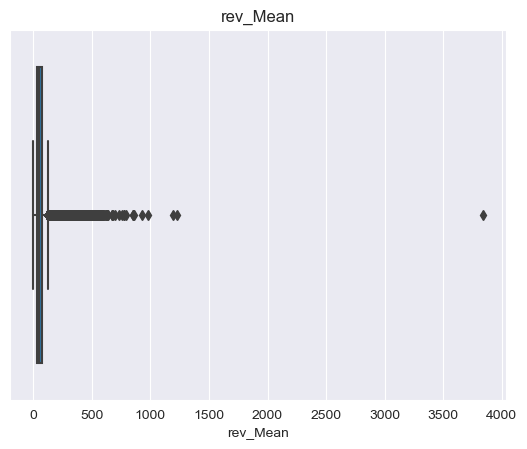

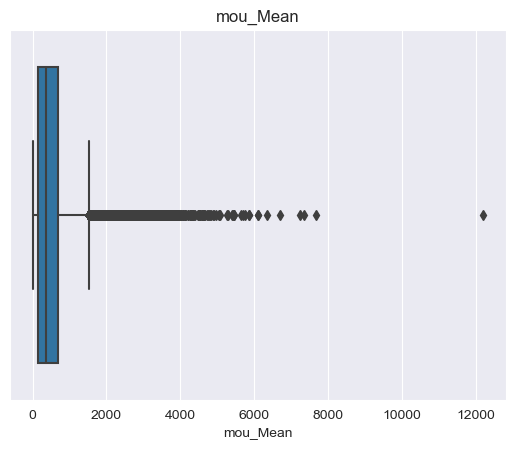

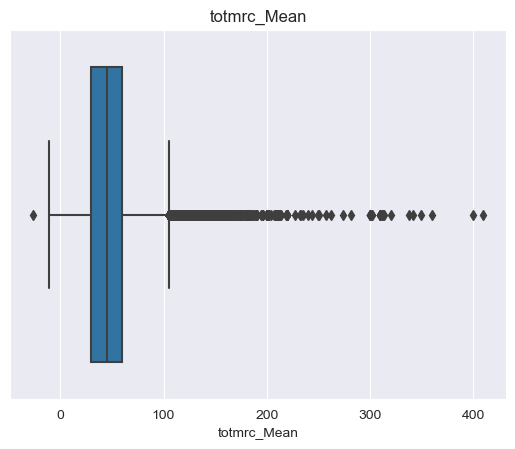

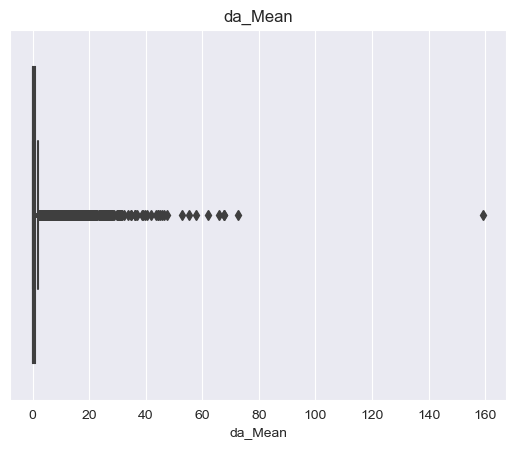

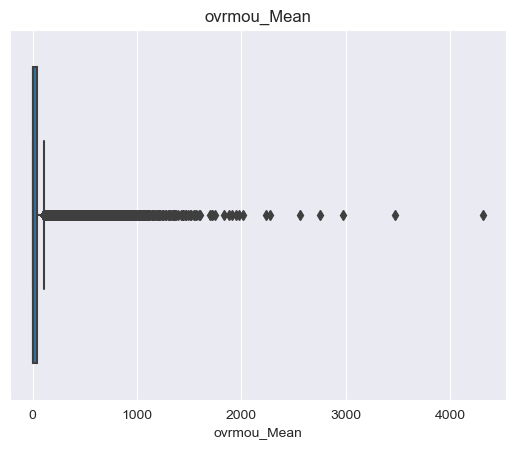

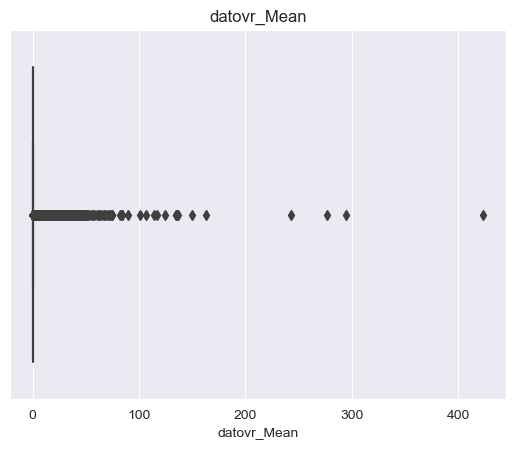

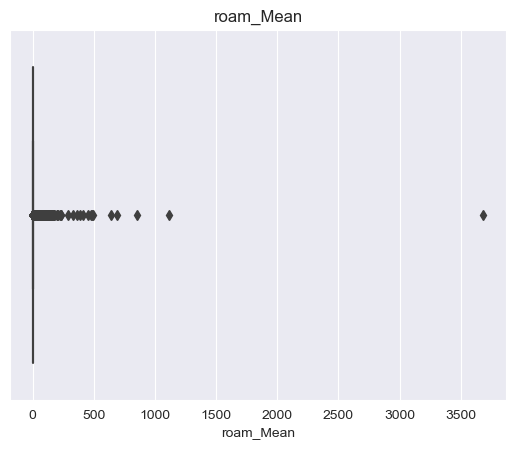

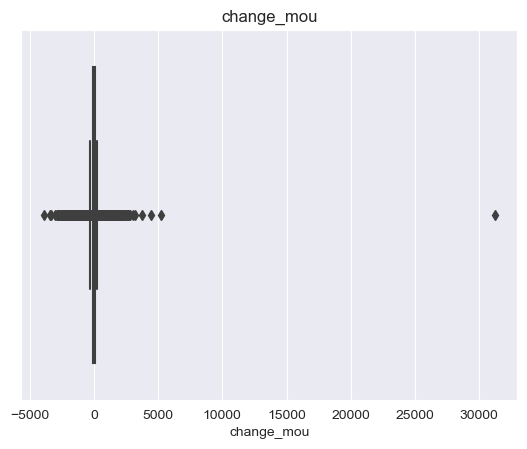

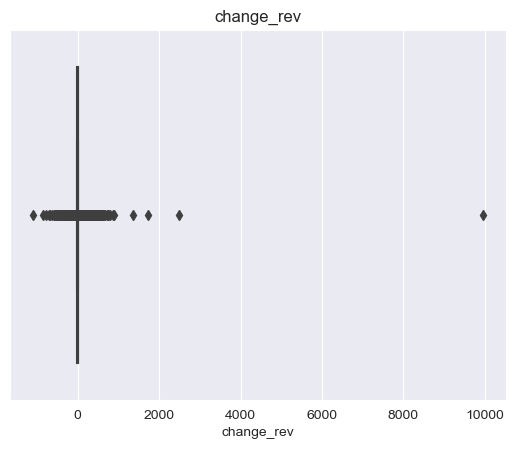

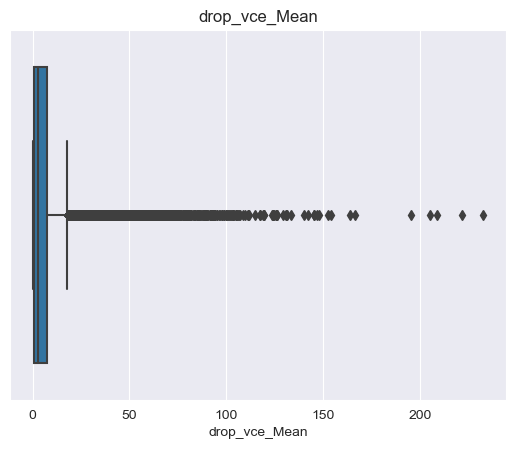

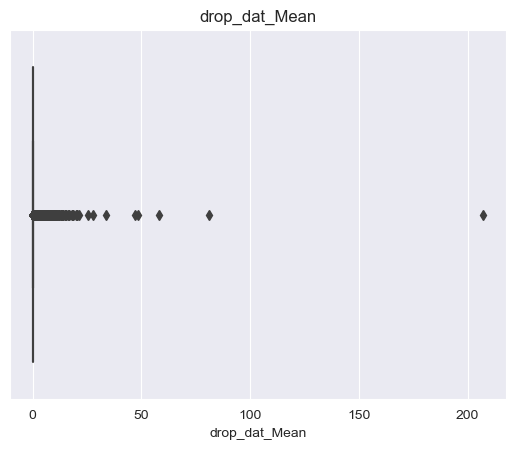

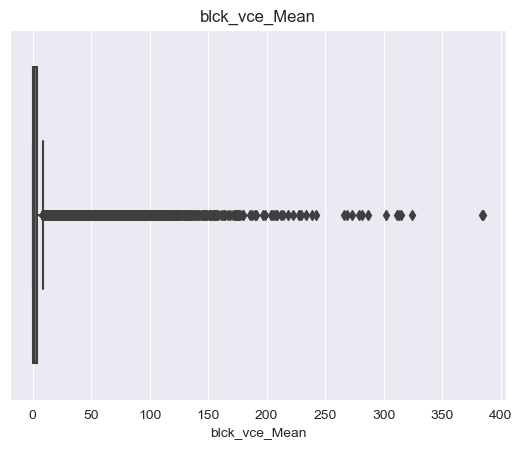

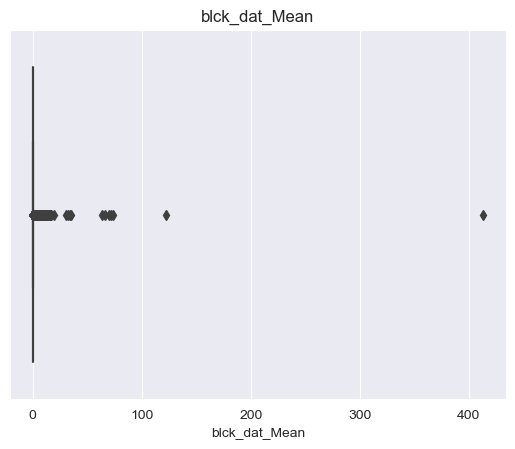

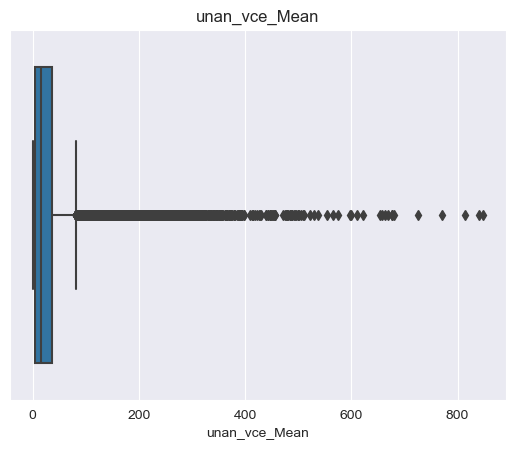

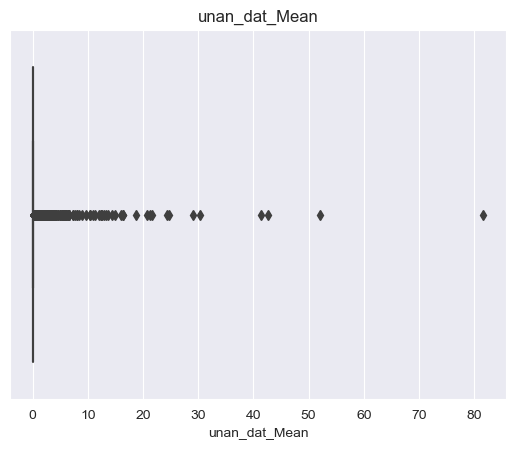

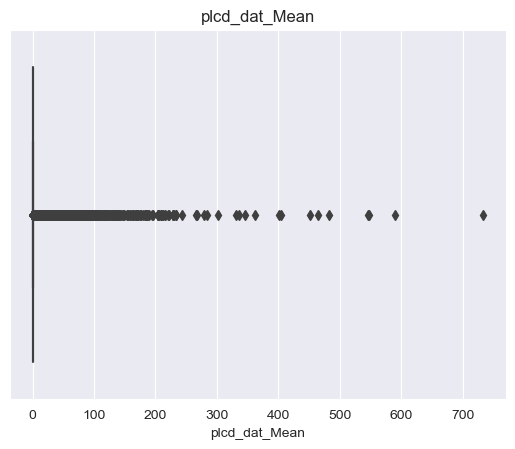

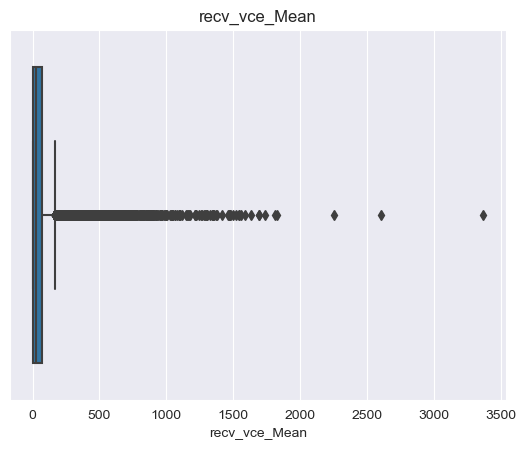

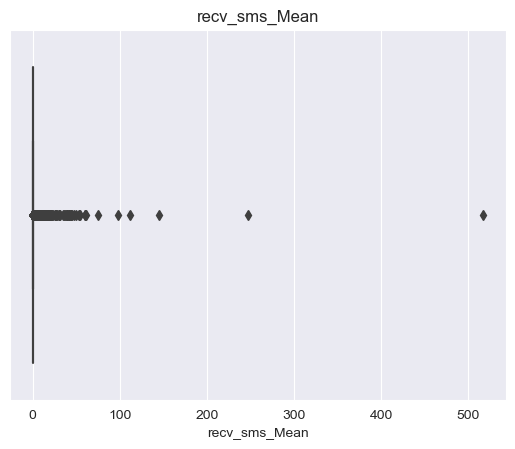

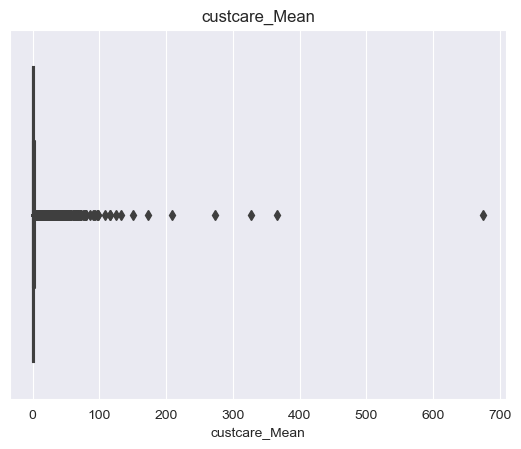

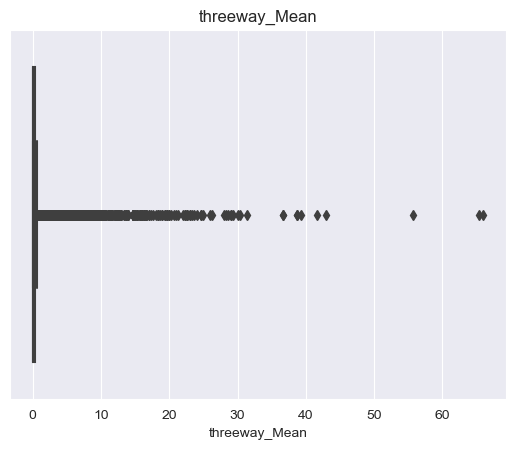

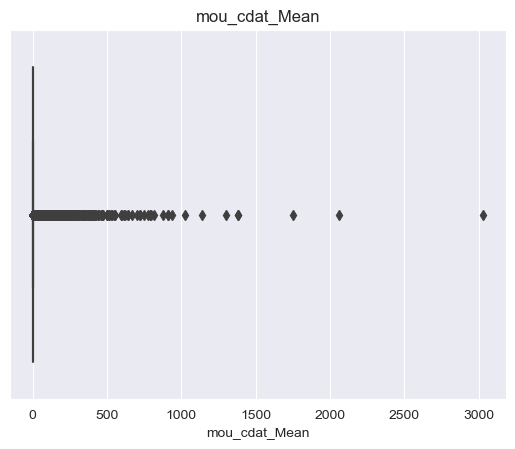

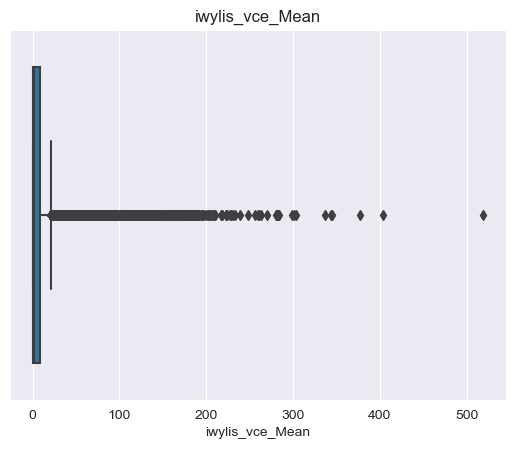

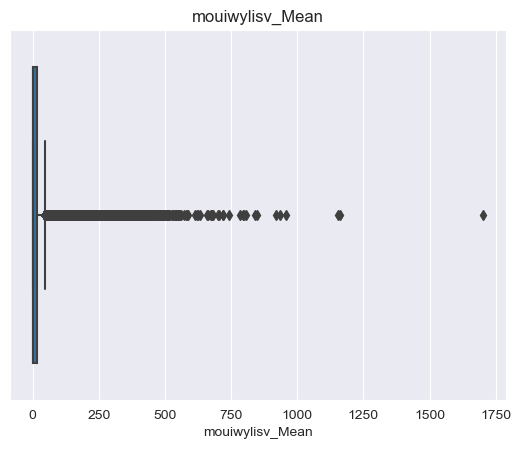

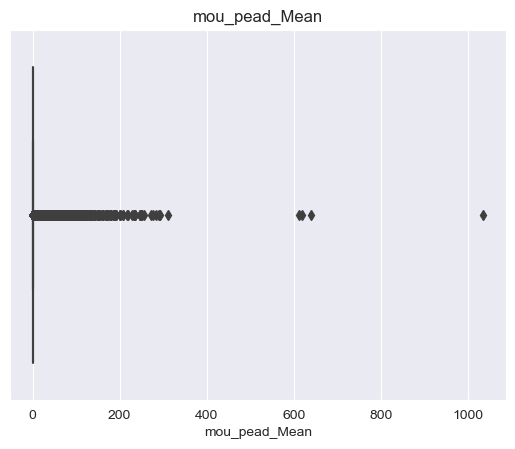

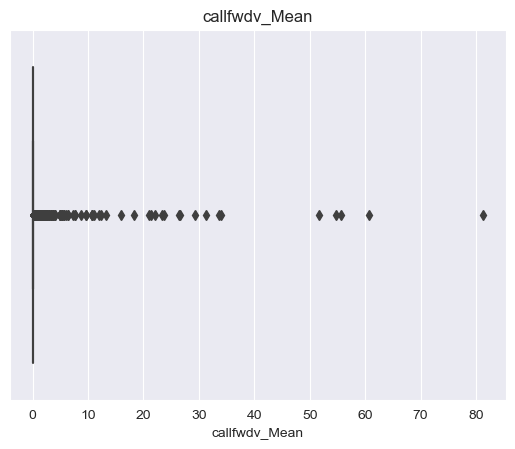

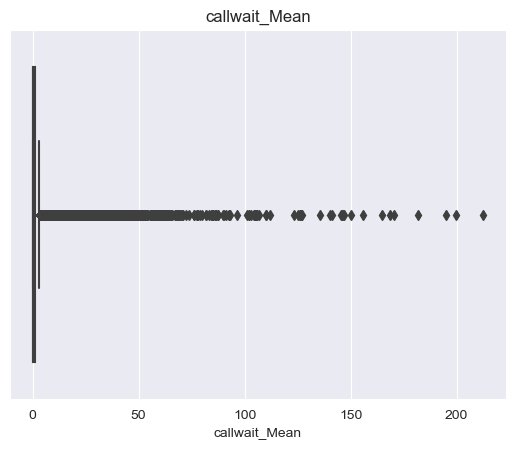

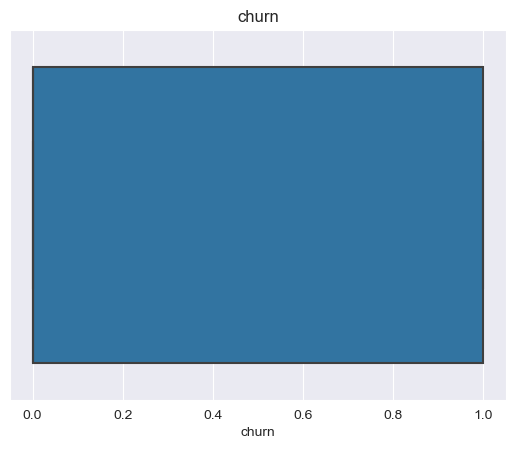

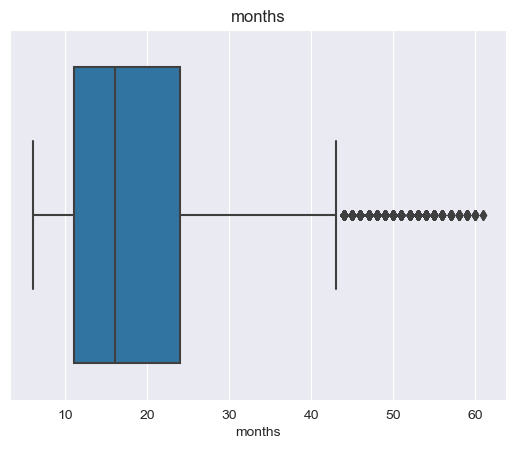

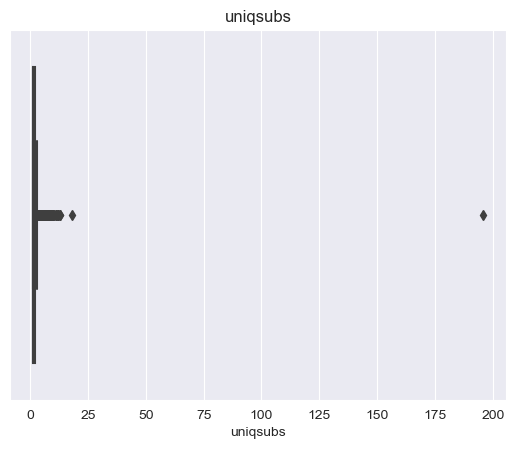

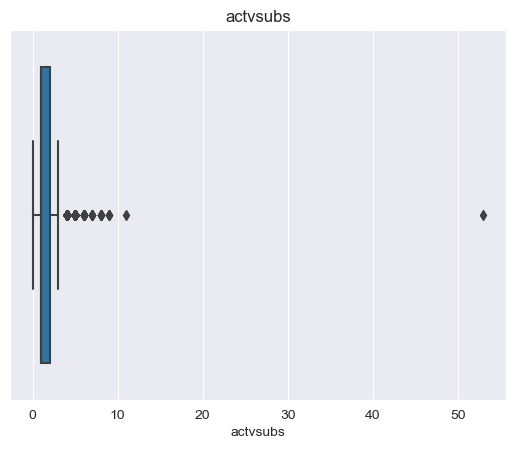

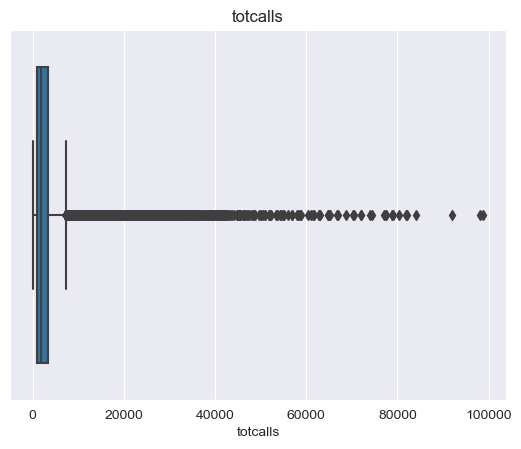

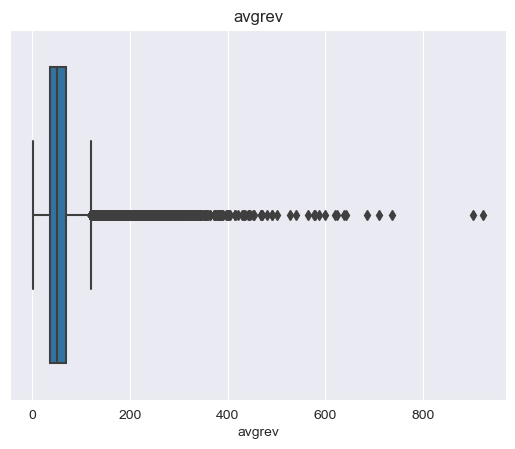

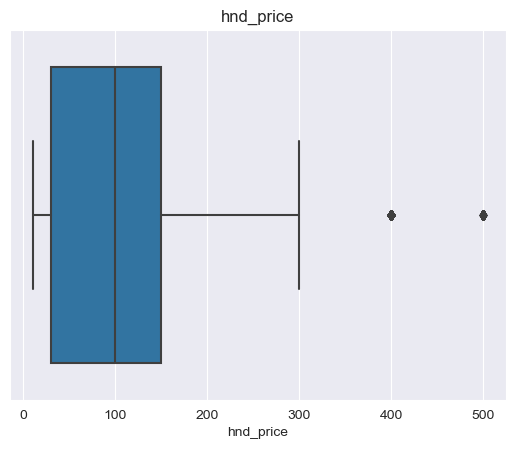

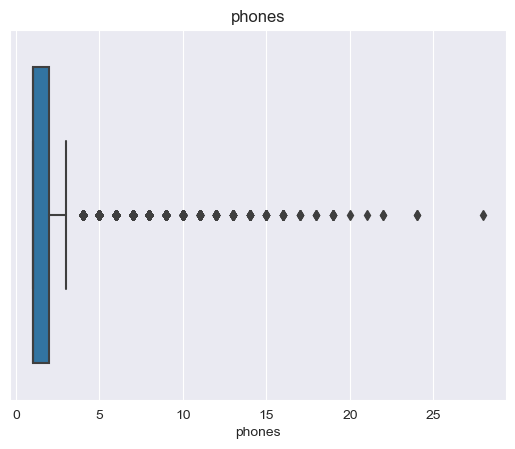

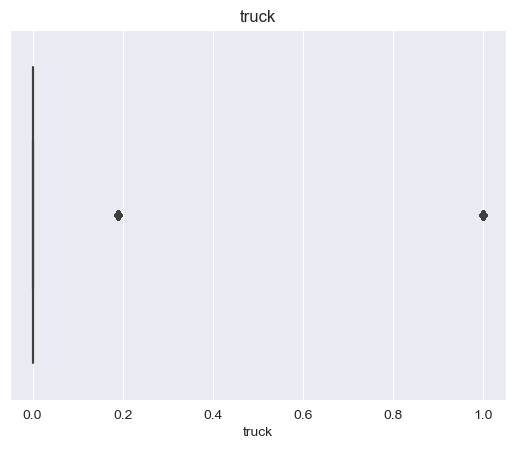

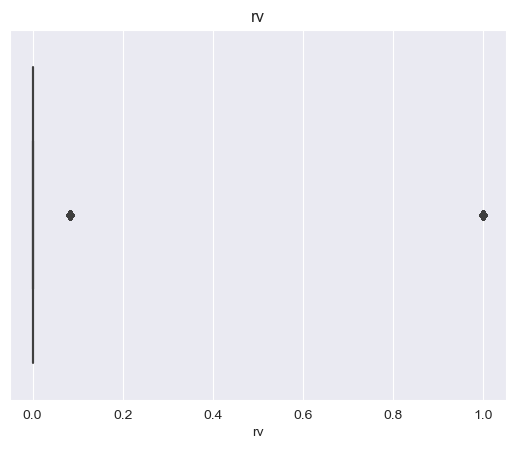

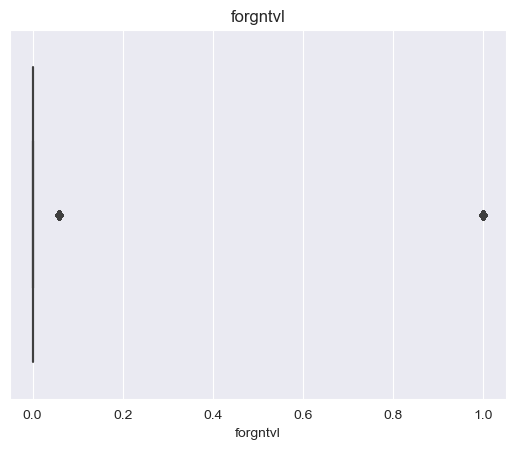

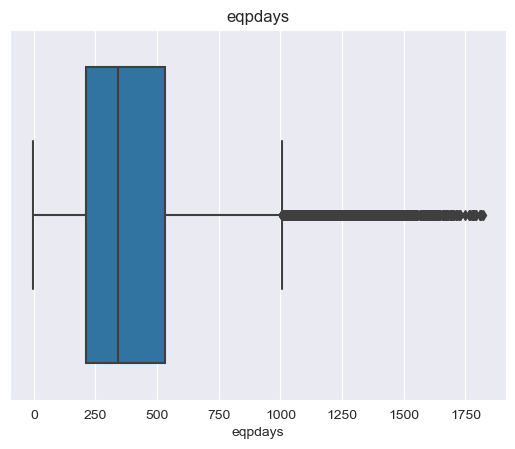

In [35]:
# Select numerical columns in the dataframe
numerical_columns = churn_imputed_data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column and create a box plot
for col in numerical_columns:
    sns.boxplot(x=churn_imputed_data[col])
    plt.title(col)
    plt.show()

In [36]:
churn_imputed_data[churn_imputed_data["rev_Mean"] == churn_imputed_data["rev_Mean"].max()]

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  datovr_Mean  \
39170  3843.2625  12206.75         30.0      0.0        82.25        0.195   

       roam_Mean  change_mou  change_rev  drop_vce_Mean  drop_dat_Mean  \
39170     3685.2    31219.25   9963.6575           25.0            0.0   

       blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  \
39170       0.333333            0.0            3.0            0.0   

       plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  custcare_Mean  \
39170       0.333333           52.0            0.0            3.0   

       threeway_Mean  mou_cdat_Mean  iwylis_vce_Mean  mouiwylisv_Mean  \
39170            0.0           0.04         3.333333             3.14   

       mou_pead_Mean  callfwdv_Mean  callwait_Mean  churn  months  uniqsubs  \
39170           0.04            0.0            0.0      1      16         1   

       actvsubs new_cell crclscod asl_flag  totcalls  avgrev prizm_social_one  \
39170         1        Y       EA        N      3359  169.98                U   

                     area dualband refurb_new  hnd_price  phones  truck   rv  \
39170  NEW YORK CITY AREA        Y          N  149.98999     2.0    0.0  0.0   

      marital  forgntvl ethnic kid0_2 kid3_5 kid6_10 kid11_15 kid16_17  \
39170       S       0.0      H      U      U       Y        Y        Y   

      creditcd  eqpdays  
39170        Y     54.0

In [37]:
churn_imputed_data[churn_imputed_data["callfwdv_Mean"] == churn_imputed_data["callfwdv_Mean"].max()]

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  datovr_Mean  \
95776    57.365    436.25        59.99      0.0          0.0          0.0   

       roam_Mean  change_mou  change_rev  drop_vce_Mean  drop_dat_Mean  \
95776        0.0     -187.25       0.025            1.0            0.0   

       blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  \
95776            4.0            0.0           27.0            0.0   

       plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  custcare_Mean  \
95776            0.0           21.0            0.0            0.0   

       threeway_Mean  mou_cdat_Mean  iwylis_vce_Mean  mouiwylisv_Mean  \
95776            0.0            0.0              7.0            10.82   

       mou_pead_Mean  callfwdv_Mean  callwait_Mean  churn  months  uniqsubs  \
95776            0.0      81.333333            0.0      0       8         1   

       actvsubs new_cell crclscod asl_flag  totcalls  avgrev prizm_social_one  \
95776         1        U       CA        Y      1322   56.76                T   

            area dualband refurb_new  hnd_price  phones  truck   rv marital  \
95776  OHIO AREA        Y          N  149.98999     1.0    0.0  0.0       U   

       forgntvl ethnic kid0_2 kid3_5 kid6_10 kid11_15 kid16_17 creditcd  \
95776       0.0      S      U      U       U        U        U        N   

       eqpdays  
95776    237.0

In [38]:
churn_imputed_data.head(10)

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  datovr_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          0.0   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   
5   82.2750   1312.25       75.000   1.2375         0.00          0.0   
6   17.1450      0.00       16.990   0.0000         0.00          0.0   
7   38.0525    682.50       52.490   0.2475         0.00          0.0   
8   97.3375   1039.00       50.000   4.9500       419.50          0.0   
9   31.6625     25.50       29.990   0.2475         0.00          0.0   

   roam_Mean  change_mou  change_rev  drop_vce_Mean  drop_dat_Mean  \
0        0.0     -157.25    -18.9975       0.666667            0.0   
1        0.0      532.25     50.9875       8.333333            0.0   
2        0.0       -4.25      0.0000       0.333333            0.0   
3        0.0       -1.50      0.0000       0.000000            0.0   
4        0.0       38.50      0.0000       9.666667            0.0   
5        0.0      156.75      8.1450      52.000000            0.0   
6        0.0        0.00     -0.1550       0.000000            0.0   
7        0.0      147.50     -3.0625       9.000000            0.0   
8        0.0      198.00     23.2625      12.666667            0.0   
9        0.0       59.50      4.0275       0.000000            0.0   

   blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  plcd_dat_Mean  \
0       0.666667            0.0       6.333333            0.0            0.0   
1       1.000000            0.0      61.333333            0.0            0.0   
2       0.000000            0.0       2.666667            0.0            0.0   
3       0.000000            0.0       0.000000            0.0            0.0   
4       0.666667            0.0      77.000000            0.0            0.0   
5       7.666667            0.0      76.000000            0.0            0.0   
6       0.000000            0.0       0.000000            0.0            0.0   
7       1.666667            0.0      13.000000            0.0            0.0   
8       3.000000            0.0     176.000000            0.0            0.0   
9       1.000000            0.0       2.333333            0.0            0.0   

   recv_vce_Mean  recv_sms_Mean  custcare_Mean  threeway_Mean  mou_cdat_Mean  \
0      42.333333            0.0       0.000000       0.000000            0.0   
1      69.000000            0.0       1.666667       0.333333            0.0   
2       0.333333            0.0       0.000000       0.000000            0.0   
3       1.333333            0.0       0.000000       0.000000            0.0   
4      94.666667            0.0       8.666667       0.000000            0.0   
5     365.000000            0.0       4.333333       1.333333            0.0   
6       0.000000            0.0       0.000000       0.000000            0.0   
7      13.000000            0.0       0.666667       0.000000            0.0   
8      96.000000            0.0      11.333333       0.333333            0.0   
9       0.000000            0.0       0.000000       0.000000            0.0   

   iwylis_vce_Mean  mouiwylisv_Mean  mou_pead_Mean  callfwdv_Mean  \
0         0.000000         0.000000            0.0            0.0   
1         6.333333         3.696667            0.0            0.0   
2         0.000000         0.000000            0.0            0.0   
3         0.000000         0.000000            0.0            0.0   
4         0.666667         0.366667            0.0            0.0   
5       147.000000        85.146667            0.0            0.0   
6         0.000000         0.000000            0.0            0.0   
7         0.000000         0.000000            0.0            0.0   
8         0.333333         0.056667          

In [39]:
def cap_max_value(df, columns):
    for col in columns:
        max_value = df[col].max()
        index = df[df[col] == max_value].index
        df = df.drop(index)
    return df

columns_to_be_capped = ["uniqsubs",
"actvsubs",
"roam_Mean",
"mou_Mean",
"rev_Mean",
"blck_dat_Mean",
"da_Mean",
"drop_dat_Mean"]

churn_df = cap_max_value(churn_imputed_data, columns_to_be_capped)

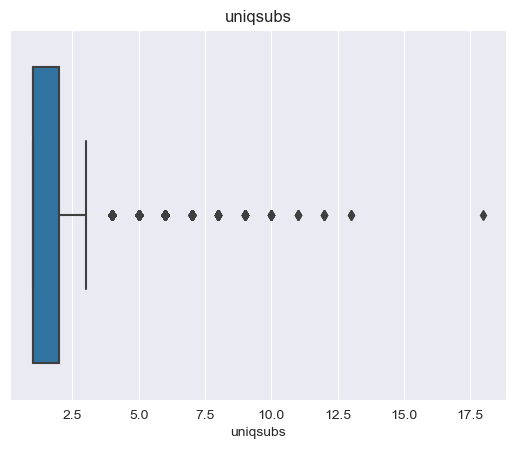

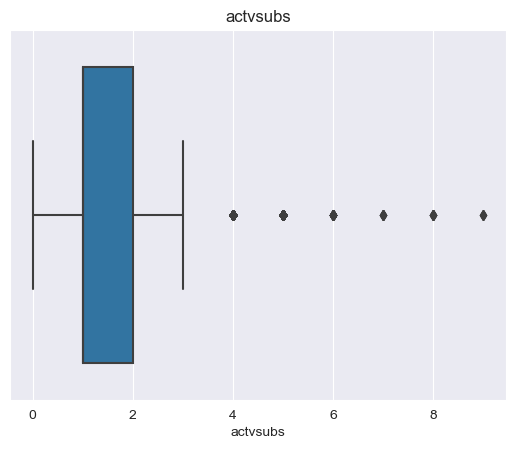

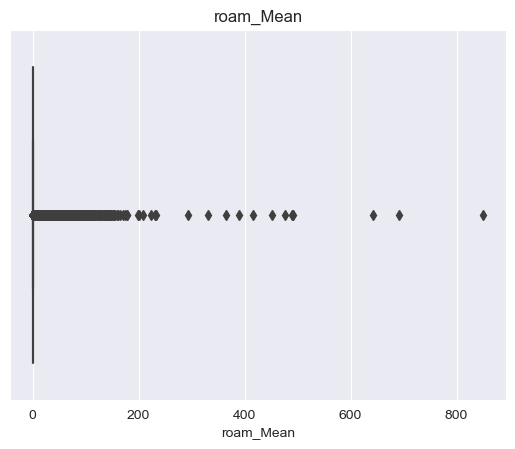

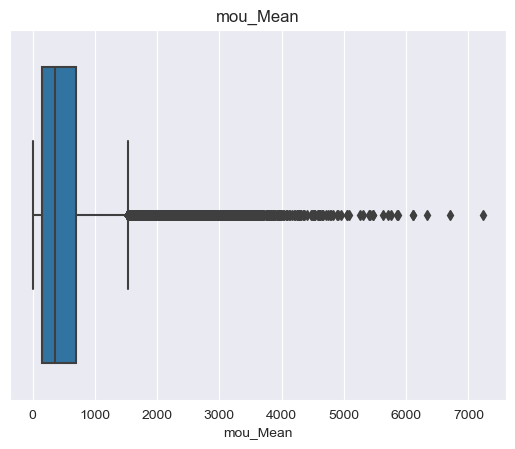

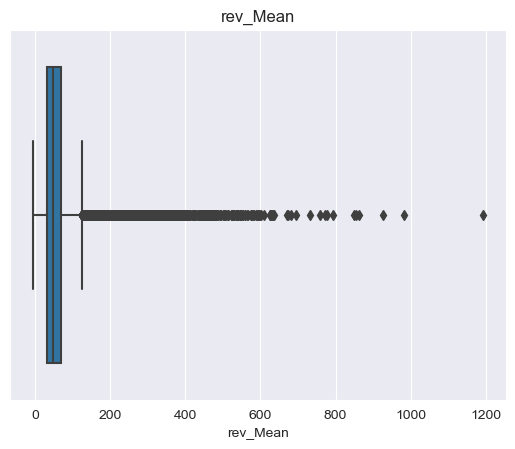

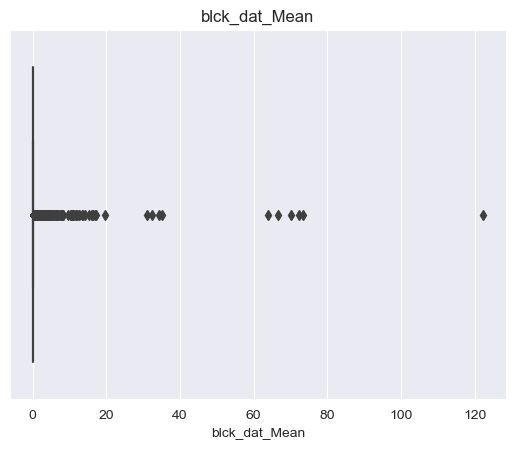

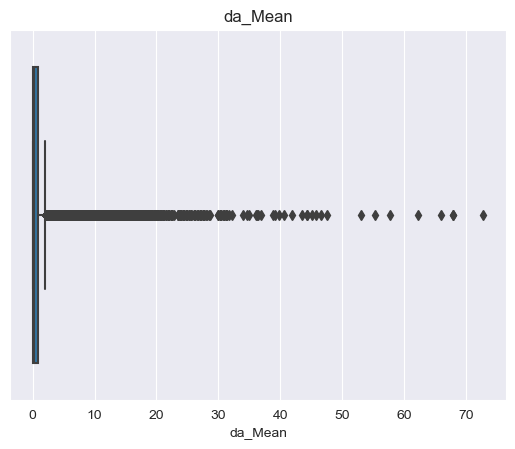

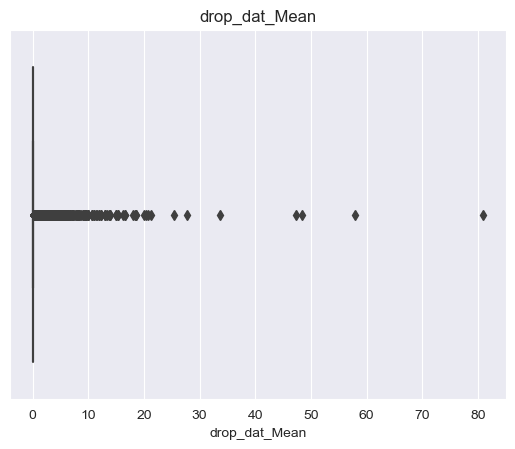

In [40]:
for col in columns_to_be_capped:
    plt.clf()
    sns.boxplot(x=churn_df[col])
    plt.title(col)
    plt.show()

In [120]:
# def detect_and_remove_outliers(df: pd.DataFrame = None):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Find the rows where any column value is outside of the range (Q1 - 3 * IQR) to (Q3 + 3 * IQR)
#     outliers = df[~((df < (Q1 - 3 * IQR)) | (df > (Q3 + 3 * IQR))).any(axis=1)]

#     # Display the data points with outliers
#     print("Data points with outliers:")
#     print(outliers)

#     # Remove the outliers from the DataFrame
#     df_without_outliers = df.drop(outliers.index, axis=0)

#     return df_without_outliers

## Checks to explore the Object Data types

In [41]:
encoding_col=[]
for i in churn_df.select_dtypes(include='object'):   
    print(i,'-->',churn_df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
crclscod --> 54
asl_flag --> 2
prizm_social_one --> 5
area --> 19
dualband --> 4
refurb_new --> 2
marital --> 5
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [42]:
churn_df['crclscod'].value_counts()

AA    36507
A     16996
BA    12667
CA     8334
EA     6417
B      4110
DA     3668
ZA     3492
C      1456
A2      861
E4      833
U       480
E       339
D4      301
GA      281
Z4      253
D       247
I       243
G       241
JF      194
Z       191
CY      190
J       189
C2      180
M       169
ZY      119
D5      114
B2      109
K       106
W        97
C5       81
V1       70
U1       66
EM       57
Z5       56
Y        54
EC       48
GY       34
O        25
CC       25
E2       21
IF       13
Z1       12
H         9
L         6
P1        6
D2        5
TP        5
Z2        5
EF        4
A3        3
S         1
V         1
ZF        1
Name: crclscod, dtype: int64

In [43]:
#Removing because of too much categorical class and assuming it has no contrubution to the churn
churn_df.drop(columns=['crclscod'], axis=1, inplace=True)

In [44]:
encoding_col = []
for i in churn_df.select_dtypes(include='object'):   
    print(i,'-->',churn_df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
asl_flag --> 2
prizm_social_one --> 5
area --> 19
dualband --> 4
refurb_new --> 2
marital --> 5
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


# Machine Learning Modelling

In [261]:
churn_df2 = churn_df.copy()
churn_df2 = pd.get_dummies(churn_df2, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [262]:
churn_df2.shape

(99992, 93)

In [263]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#Import metric, model_selection and preprocessing for performance evaluation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [264]:
def perform_train_test_split(df: pd.DataFrame = None):
    # dependent and independent variables were determined.
    X = df.drop('churn', axis=1)
    y = df['churn']
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("X_train",len(X_train))
    print("X_test",len(X_test))
    print("y_train",len(y_train))
    print("y_test",len(y_test))
    return X_train, X_test, y_train, y_test

# def perform_standard_scalar(X_train, X_test):
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
#     return X_train, X_test


def perform_robust_scalar(X_train, X_test):
    sc = RobustScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

def plot_roc_auc(model, X, y):
    # Make predictions for the dataset
    y_pred = model.predict(X)
    
    # Compute the fpr, tpr and threshold for the ROC curve
    fpr, tpr, threshold = roc_curve(y, y_pred)
    
    # Compute the AUC score
    auc = roc_auc_score(y, y_pred)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC for Churn')
    plt.legend(loc="lower right")
    plt.show()
    print("FPR:", fpr)
    print("TPR:", tpr)    
    
    
def hyperparameter_tuning(model, X_train, y_train, param_grid):
    """
    Function for hyperparameter tuning of a given model using GridSearchCV.
    model: string, 'RF' for RandomForest or 'XGB' for XGBoost
    X_train: numpy array or pandas dataframe, training features
    y_train: numpy array or pandas series, training labels
    param_grid: dictionary, containing the hyperparameters and their possible values
    """
    if model == 'RF':
        # Initialize the model
        clf = RandomForestClassifier()
    elif model == 'XGB':
        # Initialize the model
        clf = xgb.XGBClassifier()
#     elif model == 'LR':
#         clf = LogisticRegression()
    else:
        raise ValueError("Invalid model type. Please use 'RF' for Random Forest or 'XGB' for XGBoost.")
    
    # Define the scoring metric
    scoring = {'auc': make_scorer(roc_auc_score)}
    grid_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring=scoring, refit='auc', return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("Best Score:", grid_search.cv_results_['mean_train_score'])
    print("Best Score:", grid_search.cv_results_['mean_test_score'])
    return grid_search

In [265]:
X_train, X_test, y_train, y_test = perform_train_test_split(churn_df2)

X_train 69994
X_test 29998
y_train 69994
y_test 29998


In [266]:
X_train.shape

(69994, 92)

In [267]:
X_train, X_test = perform_robust_scalar(X_train, X_test)

In [268]:
X_train.shape

(69994, 92)

In [269]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [270]:
# Predict on the test set results
y_pred = rf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.6169930685645685


In [271]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion_mat)

# Generate the classification report
class_rep = classification_report(y_test, y_pred)
print("Classification report:\n", class_rep)

Confusion matrix:
 [[9345 5730]
 [5759 9164]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62     15075
           1       0.62      0.61      0.61     14923

    accuracy                           0.62     29998
   macro avg       0.62      0.62      0.62     29998
weighted avg       0.62      0.62      0.62     29998



In [272]:
#  # Predict on the train set results

# y_train_pred = rf.predict(X_train)
# roc_auc_train = roc_auc_score(y_train, y_train_pred)
# print(roc_auc_train)

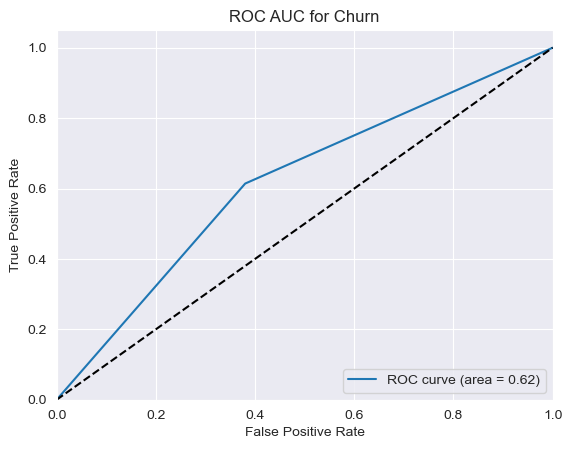

FPR: [0.        0.3800995 1.       ]
TPR: [0.         0.61408564 1.        ]


In [273]:
plot_roc_auc(rf, X_test, y_test)

### Feature importances

Text(0.5, 0, 'Feature Importance')

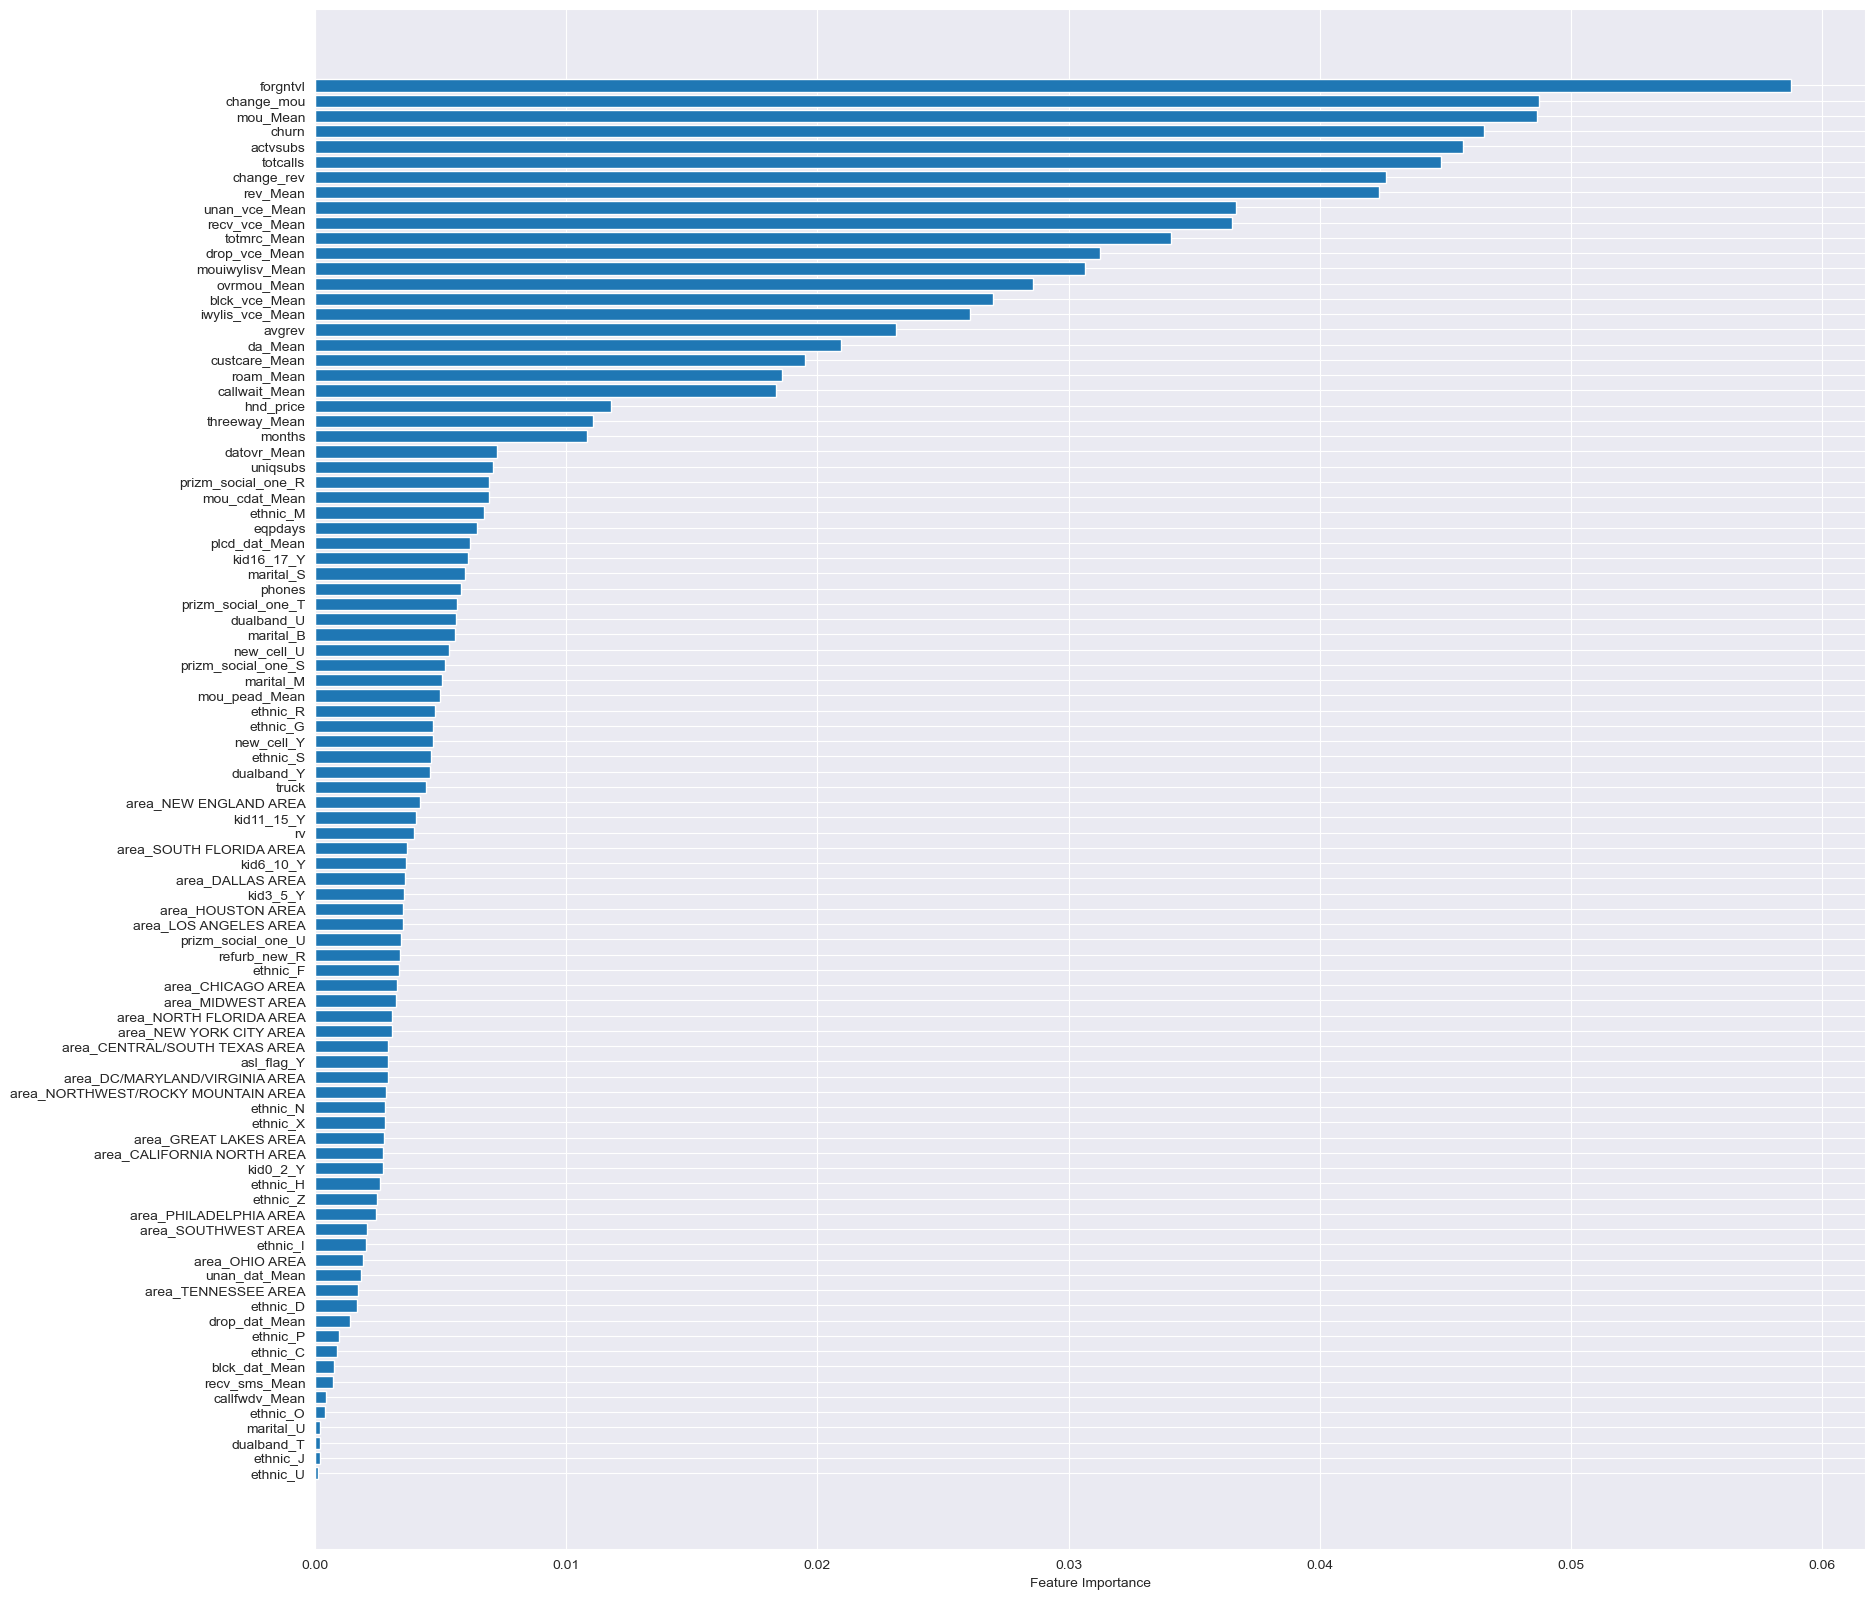

In [274]:
plt.figure(figsize=(20,20))
sort = rf.feature_importances_.argsort()
plt.barh(churn_df2.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [275]:
# Get the indices of the features sorted by importance
sort = rf.feature_importances_.argsort()

# Get the feature importances sorted in descending order
feature_importances = rf.feature_importances_[sort][::-1]

# Get the feature names sorted by importance
feature_names = churn_df2.columns[sort][::-1]

# Initialize a list to store the selected feature names
selected_features = []

# Initialize a variable to store the current sum of importances
current_sum = 0

# Loop through the features and add them to the list until the sum of importances reaches 0.9
for feature, importance in zip(feature_names, feature_importances):
    current_sum += importance
    selected_features.append(feature)
    if current_sum >= 0.9:
        break

# Print the selected features
print(selected_features)

['forgntvl', 'change_mou', 'mou_Mean', 'churn', 'actvsubs', 'totcalls', 'change_rev', 'rev_Mean', 'unan_vce_Mean', 'recv_vce_Mean', 'totmrc_Mean', 'drop_vce_Mean', 'mouiwylisv_Mean', 'ovrmou_Mean', 'blck_vce_Mean', 'iwylis_vce_Mean', 'avgrev', 'da_Mean', 'custcare_Mean', 'roam_Mean', 'callwait_Mean', 'hnd_price', 'threeway_Mean', 'months', 'datovr_Mean', 'uniqsubs', 'prizm_social_one_R', 'mou_cdat_Mean', 'ethnic_M', 'eqpdays', 'plcd_dat_Mean', 'kid16_17_Y', 'marital_S', 'phones', 'prizm_social_one_T', 'dualband_U', 'marital_B', 'new_cell_U', 'prizm_social_one_S', 'marital_M', 'mou_pead_Mean', 'ethnic_R', 'ethnic_G', 'new_cell_Y', 'ethnic_S', 'dualband_Y', 'truck', 'area_NEW ENGLAND AREA', 'kid11_15_Y']


In [276]:
subset_churn_df2 = churn_df2.loc[:, selected_features]
subset_churn_df2.head()


forgntvl  change_mou  mou_Mean  churn  actvsubs  totcalls  change_rev  \
0       0.0     -157.25    219.25      1         1      1652    -18.9975   
1       0.0      532.25    482.75      0         1     14654     50.9875   
2       0.0       -4.25     10.25      1         1      7903      0.0000   
3       0.0       -1.50      7.50      0         1      1502      0.0000   
4       0.0       38.50    570.50      0         1      4485      0.0000   

   rev_Mean  unan_vce_Mean  recv_vce_Mean  totmrc_Mean  drop_vce_Mean  \
0   23.9975       6.333333      42.333333       22.500       0.666667   
1   57.4925      61.333333      69.000000       37.425       8.333333   
2   16.9900       2.666667       0.333333       16.990       0.333333   
3   38.0000       0.000000       1.333333       38.000       0.000000   
4   55.2300      77.000000      94.666667       71.980       9.666667   

   mouiwylisv_Mean  ovrmou_Mean  blck_vce_Mean  iwylis_vce_Mean  avgrev  \
0         0.000000         0.00       0.666667         0.000000   29.66   
1         3.696667        22.75       1.000000         6.333333   51.53   
2         0.000000         0.00       0.000000         0.000000   34.54   
3         0.000000         0.00       0.000000         0.000000   40.45   
4         0.366667         0.00       0.666667         0.666667   38.69   

   da_Mean  custcare_Mean  roam_Mean  callwait_Mean   hnd_price  \
0   0.2475       0.000000        0.0       0.333333  149.989990   
1   0.2475       1.666667        0.0       5.666667  101.875763   
2   0.0000       0.000000        0.0       0.000000   29.989990   
3   0.0000       0.000000        0.0       0.000000   29.989990   
4   0.0000       8.666667        0.0       0.000000  149.989990   

   threeway_Mean  months  datovr_Mean  uniqsubs  prizm_social_one_R  \
0       0.000000      61          0.0         2                   0   
1       0.333333      56          0.0         1                   0   
2       0.000000      58          0.0         1                   0   
3       0.000000      60          0.0         1                   0   
4       0.000000      57          0.0         1                   0   

   mou_cdat_Mean  ethnic_M  eqpdays  plcd_dat_Mean  kid16_17_Y  marital_S  \
0            0.0         0    361.0            0.0           0          1   
1            0.0         0    240.0            0.0           0          1   
2            0.0         0   1504.0            0.0           0          0   
3            0.0         0   1812.0            0.0           0          0   
4            0.0         0    434.0            0.0           0          1   

   phones  prizm_social_one_T  dualband_U  marital_B  new_cell_U  \
0     2.0                   0           0          0           1   
1     7.0                   0           0          0           0   
2     2.0                   0           0          0           0   
3     1.0                   1           0          0           0   
4     6.0                   0           0          0           0   

   prizm_social_one_S  marital_M  mou_pead_Mean  ethnic_R  ethnic_G  \
0                   1          0            0.0         0         0   
1                   0          0            0.0         0         0   
2                   1          1            0.0         0         0   
3                   0          1            0.0         0         0   
4                   0          0            0.0         0         0   

   new_cell_Y  ethnic_S  dualband_Y  truck  area_NEW ENGLAND AREA  kid11_15_Y  
0           0         0           1    0.0                      0           0  
1           0         0           0    1.0                      0           0  
2           1         0           0    0.0                      0           0  
3           1         0           0    0.0                      0           0  
4           1         0           1    0.0                      1           0

In [277]:
subset_churn_df2.shape

(99992, 49)

In [278]:
X_train, X_test, y_train, y_test = perform_train_test_split(subset_churn_df2)

X_train 69994
X_test 29998
y_train 69994
y_test 29998


In [279]:
X_train.shape

(69994, 48)

In [280]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [281]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion_mat)

# Generate the classification report
class_rep = classification_report(y_test, y_pred)
print("Classification report:\n", class_rep)

Confusion matrix:
 [[9345 5730]
 [5759 9164]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62     15075
           1       0.62      0.61      0.61     14923

    accuracy                           0.62     29998
   macro avg       0.62      0.62      0.62     29998
weighted avg       0.62      0.62      0.62     29998



In [282]:
# Predict on the test set results
y_pred = rf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.6126810162815888


In [283]:
#Predict on the train set results

y_train_pred = rf.predict(X_train)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
print(roc_auc_train)

1.0


In [ ]:
param_grid_rf = {'n_estimators': [100, 250, 400],
                 'max_depth': [10, 20, 40],
                 'min_samples_split': [5, 10, 20],
                 'min_samples_leaf': [1, 2, 4]}

# Hyperparameter tuning for Random Forest
randomized_search_rf = hyperparameter_tuning('RF', X_train, y_train, param_grid_rf)

In [56]:
#Defining the modelling function
def modeling(alg, alg_name, X_train, X_test, y_train, y_test, metric_df, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
      
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)
        metric_dict = {}
        metric_dict["acc_score"] = acc_score
        metric_dict["precision"] = pre_score
        metric_dict["recall"] = rec_score
        metric_dict["f1_score"] = f_score
        metric_dict_df = pd.DataFrame([metric_dict])
        metric_df = metric_df.append(metric_dict_df, ignore_index=True)
    print_scores(alg, y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, cmap='crest', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return model

# def hyperparameter_tuning(model, X_train, y_train, param_grid):
#     """
#     Function for hyperparameter tuning of a given model using GridSearchCV.
#     model: string, 'RF' for RandomForest or 'XGB' for XGBoost
#     X_train: numpy array or pandas dataframe, training features
#     y_train: numpy array or pandas series, training labels
#     param_grid: dictionary, containing the hyperparameters and their possible values
#     """
#     if model == 'RF':
#         # Initialize the model
#         clf = RandomForestClassifier()
#     elif model == 'XGB':
#         # Initialize the model
#         clf = xgb.XGBClassifier()
# #     elif model == 'LR':
# #         clf = LogisticRegression()
#     else:
#         raise ValueError("Invalid model type. Please use 'RF' for Random Forest or 'XGB' for XGBoost.")
    
#     # Define the scoring metric
#     scoring = {'auc': make_scorer(roc_auc_score)}
#     grid_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring=scoring, refit='auc', return_train_score=True, n_jobs=-1)
#     grid_search.fit(X_train, y_train)
    
#     # Print the best parameters and best score
#     print("Best Parameters:", grid_search.best_params_)
#     print("Best Score:", grid_search.best_score_)
#     print("Best Score:", grid_search.cv_results_['mean_train_score'])
#     print("Best Score:", grid_search.cv_results_['mean_test_score']
#     return grid_search


In [57]:
X_train, X_test, y_train, y_test = perform_train_test_split(churn_df2)

X_train 69994
X_test 29998
y_train 69994
y_test 29998


In [73]:
X_train, X_test = perform_standard_scalar(X_train, X_test)

In [74]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [5, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Hyperparameter tuning for Random Forest
randomized_search_rf = hyperparameter_tuning('RF', X_train, y_train, param_grid_rf)

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {'max_depth': [10, 20, 40],
                  'learning_rate': [0.1, 0.01],
                  'n_estimators': [100, 200],
                  'subsample': [0.8, 0.9]}

# Hyperparameter tuning for XGBoost
randomized_search_xgb = hyperparameter_tuning('XGB', X_train, y_train, param_grid_xgb)

# Define the hyperparameter grid
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
randomized_search_lr = hyperparameter_tuning('LR', X_train, y_train, param_grid_lr)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best Score: 0.6237795272255772
Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
Best Score: 0.6274674155508265
Best Parameters: {'penalty': 'l2', 'C': 0.01}
Best Score: 0.5898640683420011


In [104]:
metric_df = pd.DataFrame()
RF_model = modeling(RandomForestClassifier, 'Random Forest', X_train, X_test, y_train, y_test, metric_df, params=randomized_search_rf.best_params_)
# Plot the ROC AUC curve
plot_roc_auc(RF_model, X_test, y_test, 'target variable')
feature_imp = pd.Series(RF_model.feature_importances_,
                        index=churn_df2.drop('churn', axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(18,12))
sns.barplot(x=feature_imp[:50], y=feature_imp[:50].index)
plt.title("Feature Importance")
plt.show()

Random Forest
accuracy:  0.6255312765638282
precision:  0.6161703767948348
recall:  0.6458585858585859
f1_score:  0.6254070981549376


UnboundLocalError: local variable 'metric_df' referenced before assignment

In [ ]:
XG_model = modeling(XGBClassifier, 'XGBoost Classifier', X_train, X_test, y_train, y_test, params=randomized_search_xgb.best_params_)
# Plot the ROC AUC curve
plot_roc_auc(XG_model, X_test, y_test, 'target variable')
feature_imp = pd.Series(XG_model.feature_importances_,
                        index=churn_df2.drop('churn', axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(18,12))
sns.barplot(x=feature_imp[:50], y=feature_imp[:50].index)
plt.title("Feature Importance")
plt.show()

In [ ]:
LR_model = modeling(LogisticRegression, 'Logistic Regrission', X_train, X_test, y_train, y_test, params=randomized_search_lr.best_params_)
# Plot the ROC AUC curve
plot_roc_auc(LR_model, X_test, y_test, 'target variable')

In [ ]:
metric_df.head()